<div style="background-color: #000000;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Contexte et champ méthodologique</h2>
</div>

La poule qui chante est une entreprise française d’agroalimentaire. Son activité principale est l’élevage et la vente de poulets sous le label “Poulet Agriculture Biologique”. 

Son activité actuelle est franco-française mais Patrick, le PDG de l’entreprise souhaite évaluer la possibilité de se développer à l'international.

**L'objectif** consiste à proposer une analyse des groupements de pays que l’on peut cibler pour exporter les poulets. Celle-ci sera appronfondie par une étude de marché.

Pour l'analyse, **une ACP normée avec réductions des dimensions et un clustering (CAH et Kmeans)** seront réalisés.

Le jeu de données est un appariement de données (FAO et Banque Mondiale) auquel **3 variables ont été créées par Feature engineering.** Toutes les variables sont extraites de l'année 2017.

**Ce jeu de données contient 123 pays et ceux-ci représentent : 85% de la population mondiale.**

Les variables sont les suivantes:

- Zone
- population (millions hab)	
- Disponibilité alimentaire en quantité (kg/personne/an)
- Importations - Quantité
- Production
- Exportations - Quantité
- Disponibilité intérieure
- PIB par habitant - PPA
- Taux de change
- Coûts Procedures d'Exportation
- Stabilite Politique
- Indice Dependance	
- Balance Commerciale
- Dependance Alimentaire

**Scénarios possibles :**


**Garder la France dans les données :** (scénario retenu)

- Cela peut être utile pour comparer directement les clusters contenant la France avec ceux des autres pays et pour comprendre où se positionne la France dans l'analyse.
- Si la France est incluse dans un cluster, cela peut aider à identifier des pays avec des caractéristiques similaires, ce qui peut faciliter une stratégie complémentaire de renforcement du marché tout en ciblant des marchés internationaux similaires.

**Exclure la France des données :**

- Cela peut être pertinent si l'objectif est exclusivement de se concentrer sur les opportunités à l’international, sans tenir compte de la position actuelle de la France.
- En retirant la France, vous évitez que ses données influencent la formation des clusters et la répartition des autres pays.

<div style="background-color: #000000;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<h3 style="margin: auto; padding: 20px; color: #000000); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import scientisttools as sct
from tabulate import tabulate
from sklearn.decomposition import PCA
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

c:\Users\jerem\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Afficher toutes les colonnes d'un dataframe
pd.set_option("display.max_columns", None)

<h3 style="margin: auto; padding: 20px; color: #000000; ">1.2 - Chargements du fichier</h3>
</div>

In [3]:
# Importation du fichier population
df_poule_qui_chante = pd.read_csv(
    "df_poule_qui_chante.csv", delimiter=";", encoding="utf-8", index_col=0
)

In [4]:
# Suppression de la colonne Country Code
df_poule_qui_chante.drop(["Country Code", "Code zone"], axis=1, inplace=True)

<h3 style="margin: auto; padding: 20px; color: #000000; ">1.3 - Chargements des fonctions</h3>
</div>

In [5]:
# Création de la fonction description variables ou dataset


def description_variables(df):
    # Afficher le type de la variable
    type_variable = df.dtypes

    # Nombre de lignes totales
    nb_lignes = len(df.index)

    # Nombre total de valeurs dans chaque colonne
    total_values = df.count()

    # Nombre de valeurs uniques dans chaque colonnes
    valeurs_uniques = df.nunique()

    # Calculer le nombre de valeurs manquantes pour chaque colonne
    missing_counts = df.isnull().sum()

    # Calculer le pourcentage de valeurs manquantes pour chaque colonne
    missing_percentage = (missing_counts / df.shape[0] * 100).round(2)

    # Créer un DataFrame avec les résultats
    variables_infos = pd.DataFrame(
        {
            "type": type_variable,
            "total": nb_lignes,
            "n": total_values,
            "unique": valeurs_uniques,
            #'doublons' : nb_doublons,
            "NaN": missing_counts,
            "pourcentage_(NaN)": missing_percentage,
        }
    )

    # Trier par 'pourcentage_(NaN)' dans l'ordre décroissant
    variables_infos = variables_infos.sort_values(
        by="pourcentage_(NaN)", ascending=False
    )

    print("Description donnée(s):")
    print("Le jeu de données comporte: {} observation(s)".format(df.shape[0]))
    print("Le jeu de données comporte: {} colonne(s)".format(df.shape[1]))

    return variables_infos

In [6]:
# Fonction pour les variables quantitatives


def statistiques_descriptives(data):
    # Vérifier si l'argument est une Series ou un DataFrame
    if isinstance(data, pd.Series):
        df = data.to_frame()
    elif isinstance(data, pd.DataFrame):
        df = data
    else:
        raise TypeError("L'argument doit être une Series ou un DataFrame de pandas")

    # Sélectionner seulement les colonnes numériques
    df_numeric = df.select_dtypes(include="number")

    # Nombre total de valeurs dans chaque colonne
    valeurs_totales = df_numeric.count()
    # Nombre de valeurs uniques dans chaque colonne
    valeurs_uniques = df_numeric.nunique()
    # Valeur minimum dans chaque colonne
    minimum = df_numeric.min()
    # Moyenne dans chaque colonne
    moyenne = df_numeric.mean()
    # 1er quantile dans chaque colonne
    q1 = df_numeric.quantile(0.25)
    # Mediane dans chaque colonne
    mediane = df_numeric.median()
    # 3e quantile dans chaque colonne
    q3 = df_numeric.quantile(0.75)
    # Calcul de l'intervalle interquartile - IQR
    iqr = q3 - q1
    # Valeur maximum dans chaque colonne
    maximum = df_numeric.max()
    # Ecart-type dans chaque colonne
    std = df_numeric.std()
    # Variance dans chaque colonne
    variance = df_numeric.var()
    # Skewness dans chaque colonne
    skewness = df_numeric.skew()
    # Kurtosis dans chaque colonne
    kurtosis = df_numeric.kurtosis()

    # Créer un DataFrame avec les résultats
    stats_descriptives = pd.DataFrame(
        {
            "n": valeurs_totales,
            "unique": valeurs_uniques,
            "min": minimum,
            "max": maximum,
            "moy": moyenne,
            "mediane": mediane,
            "q1": q1,
            "iqr": iqr,
            "q3": q3,
            "std": std,
            "var": variance,
            "skew": skewness,
            "kurt": kurtosis,
        }
    )

    print("Statistiques descriptives:")
    return stats_descriptives

<div style="background-color: #000000;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Réaliser l'Analyse en Composante Principale</h2>
</div>

In [7]:
# Afficher le dataframe
df_poule_qui_chante.head()

Stabilite Politique  Coûts Procedures d'Exportation  \
Zone                                                                  
afrique du sud                -0.28                         1257.00   
albanie                        0.38                           54.67   
algerie                       -0.92                          592.89   
allemagne                      0.59                          345.00   
angola                        -0.33                          825.00   

                population (millions hab)  \
Zone                                        
afrique du sud                 57009756.0   
albanie                         2884169.0   
algerie                        41389189.0   
allemagne                      82658409.0   
angola                         29816766.0   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
afrique du sud                                              35.69        
albanie                                                     16.36        
algerie                                                      6.38        
allemagne                                                   19.47        
angola                                                      10.56        

                Importations - Quantité  Production  Exportations - Quantité  \
Zone                                                                           
afrique du sud                    514.0      1667.0                     63.0   
albanie                            38.0        13.0                      0.0   
algerie                             2.0       275.0                      0.0   
allemagne                         842.0      1514.0                    646.0   
angola                            277.0        42.0                      0.0   

                Disponibilité intérieure  Taux de change  \
Zone                                                       
afrique du sud                    2118.0       13.333781   
albanie                             47.0      119.099667   
algerie                            277.0      110.973017   
allemagne                         1739.0        0.885206   
angola                             319.0      165.915951   

                PIB par habitant - PPA  \
Zone                                     
afrique du sud                 14823.6   
albanie                        14229.3   
algerie                        13805.4   
allemagne                      61563.6   
angola                          9050.0   

                Indice Dependance Alimentaire etrangere  Balance Commerciale  \
Zone                                                                           
afrique du sud                                 0.235672               -451.0   
albanie                                        0.745098                -38.0   
algerie                                        0.007220                 -2.0   
allemagne                                      0.357385               -196.0   
angola                                         0.868339               -277.0   

                Dependance Alimentaire  
Zone                                    
afrique du sud                0.242682  
albanie                       0.808511  
algerie                       0.007220  
allemagne                     0.484186  
angola                        0.868339

In [8]:
# Description du dataframe
description_variables(df_poule_qui_chante)

Description donnée(s):
Le jeu de données comporte: 123 observation(s)
Le jeu de données comporte: 13 colonne(s)


type  total    n  \
Stabilite Politique                                 float64    123  123   
Coûts Procedures d'Exportation                      float64    123  123   
population (millions hab)                           float64    123  123   
Disponibilité alimentaire en quantité (kg/perso...  float64    123  123   
Importations - Quantité                             float64    123  123   
Production                                          float64    123  123   
Exportations - Quantité                             float64    123  123   
Disponibilité intérieure                            float64    123  123   
Taux de change                                      float64    123  123   
PIB par habitant - PPA                              float64    123  123   
Indice Dependance Alimentaire etrangere             float64    123  123   
Balance Commerciale                                 float64    123  123   
Dependance Alimentaire                              float64    123  123   

                                                    unique  NaN  \
Stabilite Politique                                    100    0   
Coûts Procedures d'Exportation                          97    0   
population (millions hab)                              123    0   
Disponibilité alimentaire en quantité (kg/perso...     122    0   
Importations - Quantité                                 78    0   
Production                                             103    0   
Exportations - Quantité                                 49    0   
Disponibilité intérieure                               110    0   
Taux de change                                          88    0   
PIB par habitant - PPA                                 123    0   
Indice Dependance Alimentaire etrangere                105    0   
Balance Commerciale                                     82    0   
Dependance Alimentaire                                 106    0   

                                                    pourcentage_(NaN)  
Stabilite Politique                                               0.0  
Coûts Procedures d'Exportation                                    0.0  
population (millions hab)                                         0.0  
Disponibilité alimentaire en quantité (kg/perso...                0.0  
Importations - Quantité                                           0.0  
Production                                                        0.0  
Exportations - Quantité                                           0.0  
Disponibilité intérieure                                          0.0  
Taux de change                                                    0.0  
PIB par habitant - PPA                                            0.0  
Indice Dependance Alimentaire etrangere                           0.0  
Balance Commerciale                                               0.0  
Dependance Alimentaire                                            0.0

<h4 style="margin: auto; padding: 20px; color: #000000; ">2.1.1 Statistiques descriptives des données</h4>
</div>

In [9]:
# Statistiques descriptives des données (quantitatives)
statistiques_descriptives(df_poule_qui_chante)

Statistiques descriptives:


n  unique          min  \
Stabilite Politique                                 123     100     -2.41000   
Coûts Procedures d'Exportation                      123      97      0.00000   
population (millions hab)                           123     123  52045.00000   
Disponibilité alimentaire en quantité (kg/perso...  123     122      0.45000   
Importations - Quantité                             123      78      0.00000   
Production                                          123     103      0.00000   
Exportations - Quantité                             123      49      0.00000   
Disponibilité intérieure                            123     110      3.00000   
Taux de change                                      123      88      0.30335   
PIB par habitant - PPA                              123     123   1498.90000   
Indice Dependance Alimentaire etrangere             123     105      0.00000   
Balance Commerciale                                 123      82  -1059.00000   
Dependance Alimentaire                              123     106      0.00000   

                                                             max  \
Stabilite Politique                                 1.590000e+00   
Coûts Procedures d'Exportation                      2.222690e+03   
population (millions hab)                           1.421022e+09   
Disponibilité alimentaire en quantité (kg/perso...  6.739000e+01   
Importations - Quantité                             1.069000e+03   
Production                                          2.191400e+04   
Exportations - Quantité                             4.223000e+03   
Disponibilité intérieure                            1.826600e+04   
Taux de change                                      2.237009e+04   
PIB par habitant - PPA                              1.338450e+05   
Indice Dependance Alimentaire etrangere             1.000000e+00   
Balance Commerciale                                 4.220000e+03   
Dependance Alimentaire                              3.239286e+00   

                                                             moy  \
Stabilite Politique                                 1.617886e-02   
Coûts Procedures d'Exportation                      3.675875e+02   
population (millions hab)                           5.217167e+07   
Disponibilité alimentaire en quantité (kg/perso...  2.252756e+01   
Importations - Quantité                             1.089675e+02   
Production                                          9.312195e+02   
Exportations - Quantité                             1.330650e+02   
Disponibilité intérieure                            8.894959e+02   
Taux de change                                      5.109712e+02   
PIB par habitant - PPA                              2.703824e+04   
Indice Dependance Alimentaire etrangere             3.091508e-01   
Balance Commerciale                                 2.409756e+01   
Dependance Alimentaire                              3.965956e-01   

                                                         mediane  \
Stabilite Politique                                 9.000000e-02   
Coûts Procedures d'Exportation                      3.026300e+02   
population (millions hab)                           9.729823e+06   
Disponibilité alimentaire en quantité (kg/perso...  2.043000e+01   
Importations - Quantité                             2.100000e+01   
Production                                          1.100000e+02   
Exportations - Quantité                             3.000000e+00   
Disponibilité intérieure                            1.570000e+02   
Taux de change                                      7.487661e+00   
PIB par habitant - PPA                              1.944970e+04   
Indice Dependance Alimentaire etrangere             1.949686e-01   
Balance Commerciale                                -9.000000e+00   
Dependance Alimentaire                              2.180451e-01   

                                                              q1  \
Stabil

In [10]:
# Vérification des types de colonnes
print(df_poule_qui_chante.dtypes)

# Sélection des colonnes numériques uniquement
df_poule_qui_chante = df_poule_qui_chante.select_dtypes(include=["float64", "int64"])

# Vérification du DataFrame numérique
print(df_poule_qui_chante.head())

Stabilite Politique                                       float64
Coûts Procedures d'Exportation                            float64
population (millions hab)                                 float64
Disponibilité alimentaire en quantité (kg/personne/an)    float64
Importations - Quantité                                   float64
Production                                                float64
Exportations - Quantité                                   float64
Disponibilité intérieure                                  float64
Taux de change                                            float64
PIB par habitant - PPA                                    float64
Indice Dependance Alimentaire etrangere                   float64
Balance Commerciale                                       float64
Dependance Alimentaire                                    float64
dtype: object
                Stabilite Politique  Coûts Procedures d'Exportation  \
Zone                                                     

In [11]:
# Afficher la matrice de corrélation
matrice_correlation = df_poule_qui_chante.corr()
matrice_correlation.head()

Stabilite Politique  \
Stabilite Politique                                            1.000000   
Coûts Procedures d'Exportation                                -0.286700   
population (millions hab)                                     -0.168920   
Disponibilité alimentaire en quantité (kg/perso...             0.337871   
Importations - Quantité                                        0.036893   

                                                    Coûts Procedures d'Exportation  \
Stabilite Politique                                                      -0.286700   
Coûts Procedures d'Exportation                                            1.000000   
population (millions hab)                                                 0.030741   
Disponibilité alimentaire en quantité (kg/perso...                        0.088127   
Importations - Quantité                                                   0.001602   

                                                    population (millions hab)  \
Stabilite Politique                                                 -0.168920   
Coûts Procedures d'Exportation                                       0.030741   
population (millions hab)                                            1.000000   
Disponibilité alimentaire en quantité (kg/perso...                  -0.123323   
Importations - Quantité                                              0.144665   

                                                    Disponibilité alimentaire en quantité (kg/personne/an)  \
Stabilite Politique                                                                          0.337871        
Coûts Procedures d'Exportation                                                               0.088127        
population (millions hab)                                                                   -0.123323        
Disponibilité alimentaire en quantité (kg/perso...                                           1.000000        
Importations - Quantité                                                                      0.163546        

                                                    Importations - Quantité  \
Stabilite Politique                                                0.036893   
Coûts Procedures d'Exportation                                     0.001602   
population (millions hab)                                          0.144665   
Disponibilité alimentaire en quantité (kg/perso...                 0.163546   
Importations - Quantité                                            1.000000   

                                                    Production  \
Stabilite Politique                                  -0.068490   
Coûts Procedures d'Exportation                        0.022030   
population (millions hab)                             0.616459   
Disponibilité alimentaire en quantité (kg/perso...    0.195218   
Importations - Quantité                               0.174010   

                                                    Exportations - Quantité  \
Stabilite Politique                                                0.006373   
Coûts Procedures d'Exportation                                    -0.013974   
population (millions hab)                                          0.207990   
Disponibilité alimentaire en quantité (kg/perso...                 0.269993   
Importations - Quantité                                            0.095555   

                                                    Disponibilité intérieure  \
Stabilite Politique                                                -0.081997   
Coûts Procedures d'Exportation                                      0.032133   
population (millions hab)                                           0.674643   
Disponibilité alimentaire en quantité (kg/perso...                  0.178809   
Importations - Quantité                                             0.249244   

                                                    Taux de change  \
Stabilite Politique                   

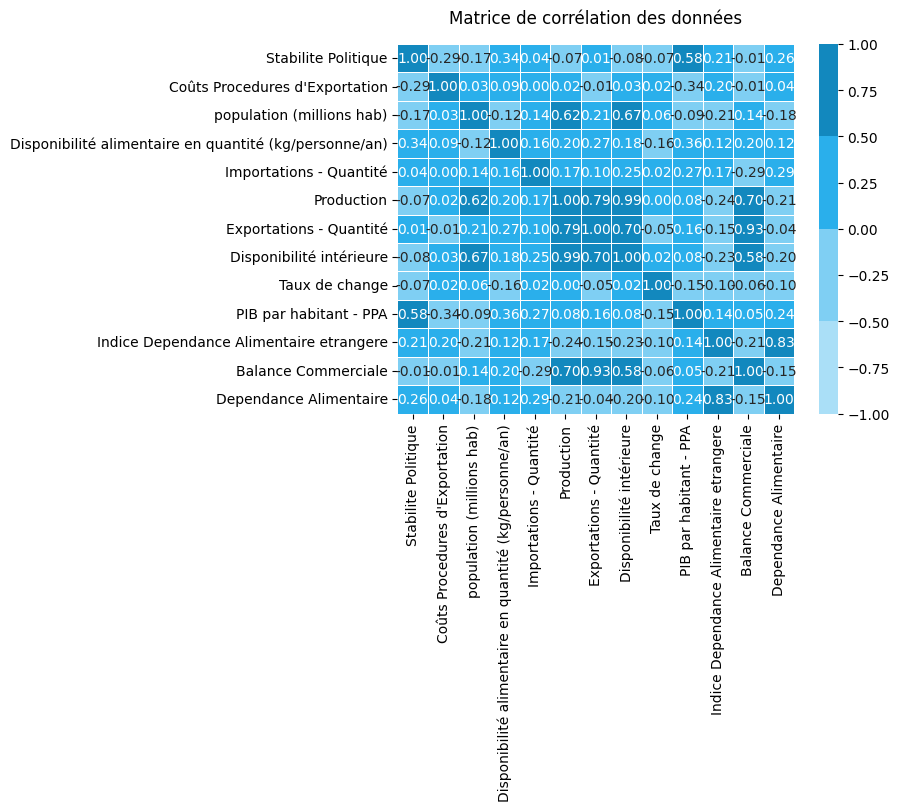

In [12]:
# Matrice de corrélation sous forme de heatmap
custom_palette = ["#AADFF7", "#7FCFF3", "#2AAFEB", "#1288BE"]
sns.heatmap(
    matrice_correlation,
    vmin=-1,
    vmax=1,
    center=None,
    cmap=sns.color_palette(custom_palette, as_cmap=True),
    annot=True,
    fmt=".2f",
    linewidth=0.5,
)

# Ajouter un titre
plt.title("Matrice de corrélation des données", pad=15)

# Afficher le graphique
plt.show()

<h4 style="margin: auto; padding: 20px; color: #000000; ">2.1.2 Construire l'ACP</h4>
</div>

In [13]:
import scientisttools as sct
from scientisttools import PCA
from scientisttools import get_eig

# Standardiser et construire l'acp
res_pca = PCA(standardize=True, n_components=None)
res_pca.fit(df_poule_qui_chante)

# Extraire et afficher les valeurs propres
valeurs_propres = res_pca.eig_
valeurs_propres

eigenvalue  difference    proportion  cumulative
Dim.1   3.830711e+00    1.316933  2.946701e+01   29.467011
Dim.2   2.513778e+00    0.896353  1.933675e+01   48.803765
Dim.3   1.617425e+00    0.246708  1.244173e+01   61.245498
Dim.4   1.370717e+00    0.410129  1.054398e+01   71.789475
Dim.5   9.605883e-01    0.038545  7.389141e+00   79.178616
Dim.6   9.220428e-01    0.220125  7.092637e+00   86.271253
Dim.7   7.019174e-01    0.259785  5.399364e+00   91.670617
Dim.8   4.421320e-01    0.100026  3.401016e+00   95.071633
Dim.9   3.421065e-01    0.154483  2.631589e+00   97.703221
Dim.10  1.876237e-01    0.077051  1.443259e+00   99.146481
Dim.11  1.105731e-01    0.110189  8.505627e-01   99.997043
Dim.12  3.843768e-04    0.000384  2.956745e-03  100.000000
Dim.13  4.056317e-32         NaN  3.120244e-31  100.000000

In [14]:
from scientisttools import summaryPCA

# Résumer des principaux résultats
summaryPCA(res_pca)

                     Principal Component Analysis - Results                     

Importance of components
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7  \
Variance               3.831   2.514   1.617   1.371   0.961   0.922   0.702   
Difference             1.317   0.896   0.247   0.410   0.039   0.220   0.260   
% of var.             29.467  19.337  12.442  10.544   7.389   7.093   5.399   
Cumulative % of var.  29.467  48.804  61.245  71.789  79.179  86.271  91.671   

                       Dim.8   Dim.9  Dim.10  Dim.11   Dim.12  Dim.13  
Variance               0.442   0.342   0.188   0.111    0.000     0.0  
Difference             0.100   0.154   0.077   0.110    0.000     NaN  
% of var.              3.401   2.632   1.443   0.851    0.003     0.0  
Cumulative % of var.  95.072  97.703  99.146  99.997  100.000   100.0  

Individuals (the 10 first)

                     dist  weight  inertia  Dim.1    ctr   cos2  Dim.2    ctr  \
afrique du sud      3.

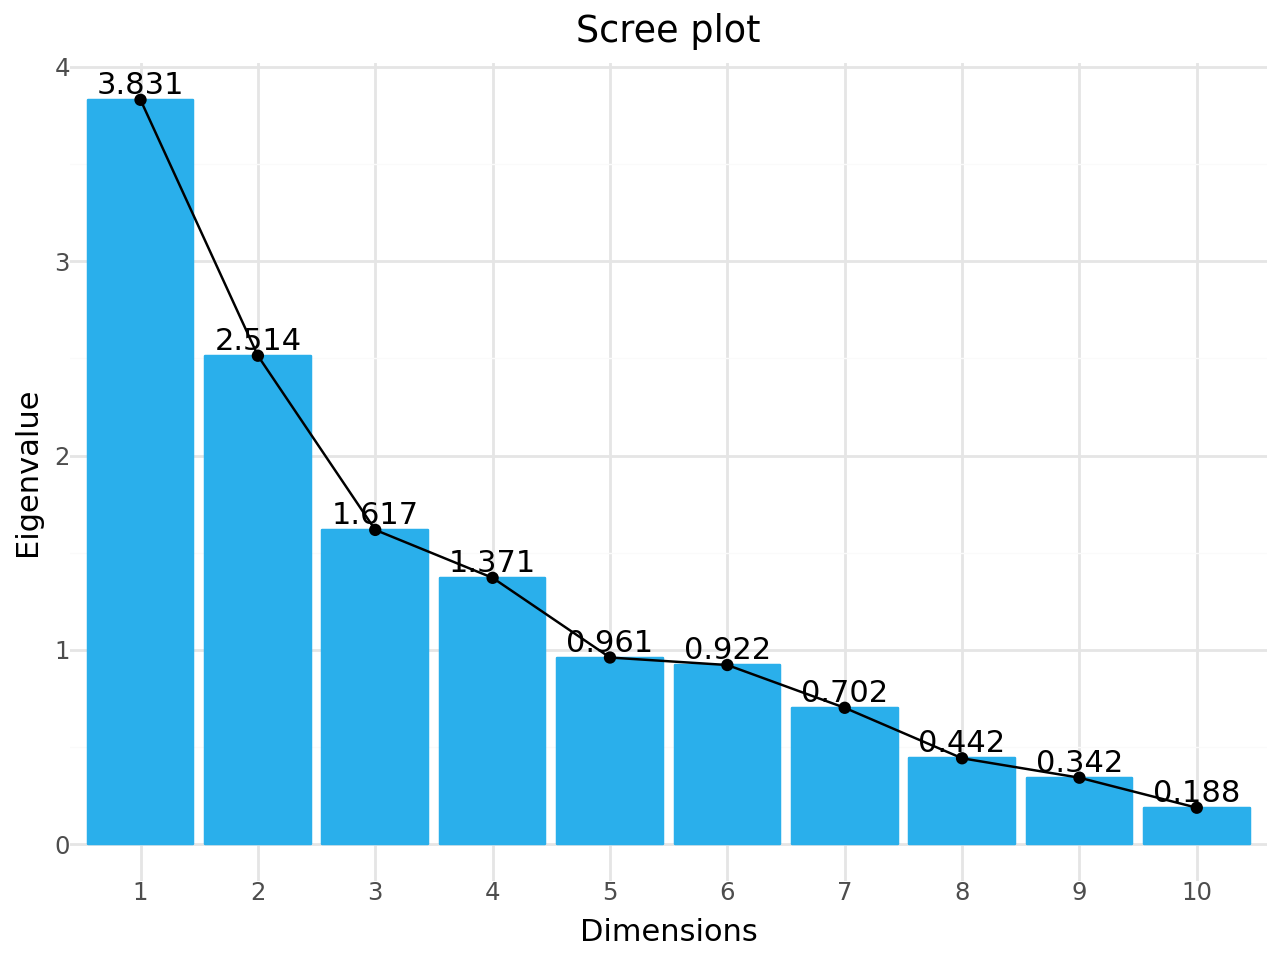

In [15]:
from scientisttools import fviz_screeplot

# Graphique des valeurs propres
fviz_screeplot(
    res_pca,
    choice="eigenvalue",
    add_labels=True,
    bar_fill="#2AAFEB",
    bar_color="#2AAFEB",
)

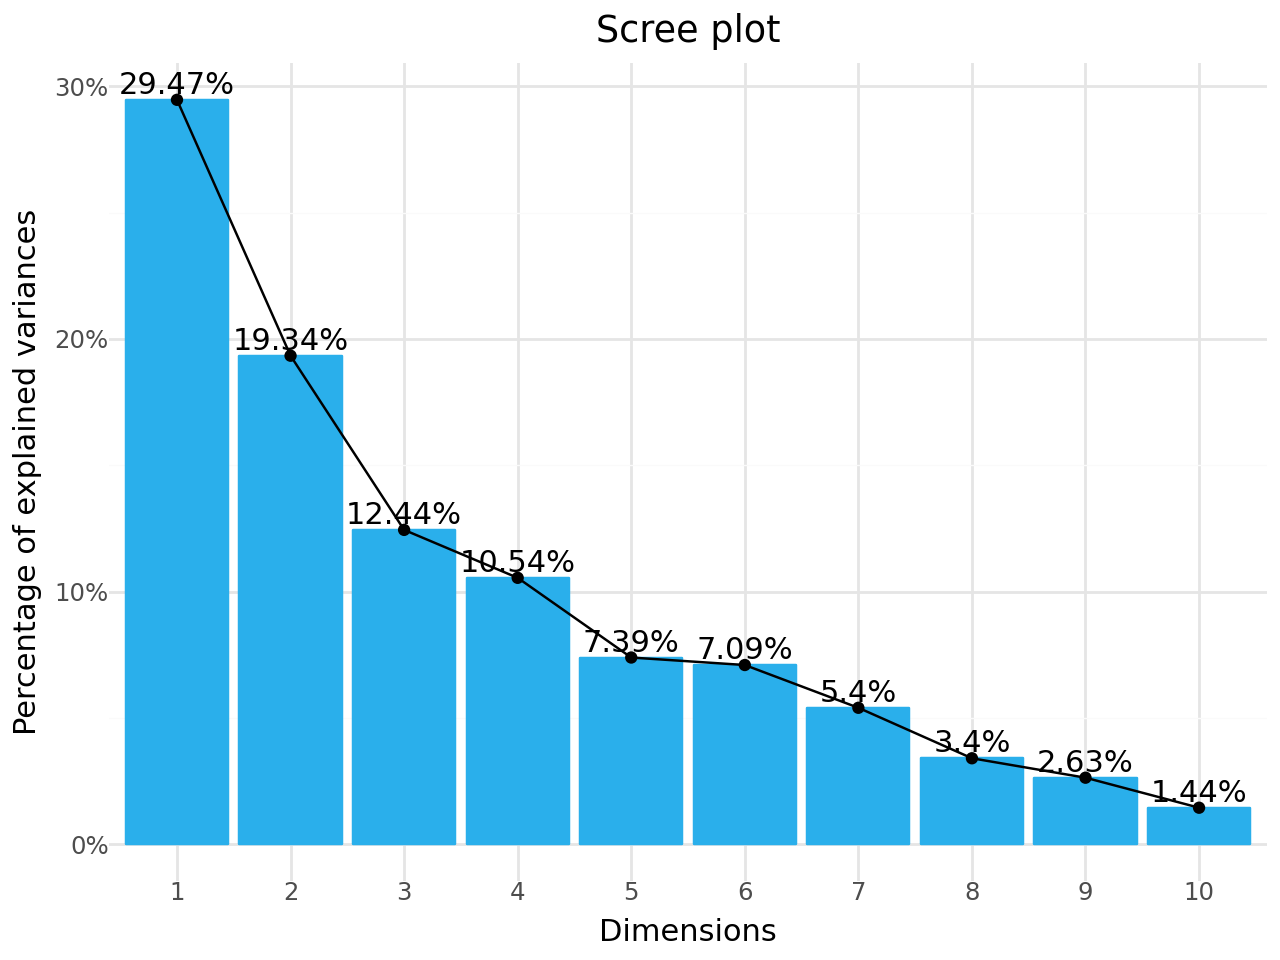

In [16]:
# Screeplot avec proportions
fviz_screeplot(
    res_pca,
    choice="proportion",
    add_labels=True,
    bar_fill="#2AAFEB",
    bar_color="#2AAFEB",
)

<h4 style="margin: auto; padding: 20px; color: #000000; ">2.1.3 Seuils pour la détection des facteurs </h4>
</div>

**Règle de Kaiser - Guttman**

Dans une ACP normée, la somme des valeurs propres étant égale au nombre de variables, leur moyenne vaut 1. Nous considérons par conséquent qu’un axe est intéressant si sa valeur propre est supérieure 1.

In [17]:
# Affcicher les valeurs propres
print(valeurs_propres)

          eigenvalue  difference    proportion  cumulative
Dim.1   3.830711e+00    1.316933  2.946701e+01   29.467011
Dim.2   2.513778e+00    0.896353  1.933675e+01   48.803765
Dim.3   1.617425e+00    0.246708  1.244173e+01   61.245498
Dim.4   1.370717e+00    0.410129  1.054398e+01   71.789475
Dim.5   9.605883e-01    0.038545  7.389141e+00   79.178616
Dim.6   9.220428e-01    0.220125  7.092637e+00   86.271253
Dim.7   7.019174e-01    0.259785  5.399364e+00   91.670617
Dim.8   4.421320e-01    0.100026  3.401016e+00   95.071633
Dim.9   3.421065e-01    0.154483  2.631589e+00   97.703221
Dim.10  1.876237e-01    0.077051  1.443259e+00   99.146481
Dim.11  1.105731e-01    0.110189  8.505627e-01   99.997043
Dim.12  3.843768e-04    0.000384  2.956745e-03  100.000000
Dim.13  4.056317e-32         NaN  3.120244e-31  100.000000


In [18]:
# Filtrer selon la règle de Kaiser-Gutman
# Extraire les valeurs propres
valeurs_propres = valeurs_propres["eigenvalue"]

# Convertir en float et supprimer les valeurs non numériques
valeurs_propres = pd.to_numeric(valeurs_propres, errors="coerce").dropna()

# Appliquer la règle de Kaiser-Gutman
kaiser_components = [i for i, val in enumerate(valeurs_propres) if val > 1]

# Afficher les résultats
print("Composantes retenues avec la règle de Kaiser-Gutman :", kaiser_components)

Composantes retenues avec la règle de Kaiser-Gutman : [0, 1, 2, 3]


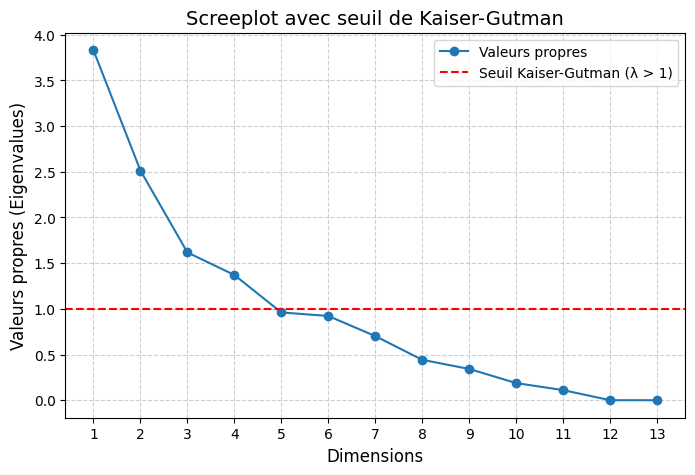

In [19]:
# Créer les indices des dimensions (1, 2, 3, ...)
dimensions = range(1, len(valeurs_propres) + 1)

# Tracer le screeplot
plt.figure(figsize=(8, 5))
plt.plot(dimensions, valeurs_propres, marker="o", label="Valeurs propres")
plt.axhline(y=1, color="red", linestyle="--", label="Seuil Kaiser-Gutman (λ > 1)")

# Ajouter des labels, titre, et légende
plt.title("Screeplot avec seuil de Kaiser-Gutman", fontsize=14)
plt.xlabel("Dimensions", fontsize=12)
plt.ylabel("Valeurs propres (Eigenvalues)", fontsize=12)
plt.xticks(dimensions)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Afficher le graphique
plt.show()

Les 4 premières dimensions sont retenues selon la règle de Kaiser-Gutman soit 71,7% de la variance expliquée.

<h3 style="margin: auto; padding: 20px; color: #000000; ">2.1.4 - Représentation graphique</h3>
</div>

<h4 style="margin: auto; padding: 20px; color: #000000; ">Graphes sur les dimensions 1 et 2 </h4>
</div>

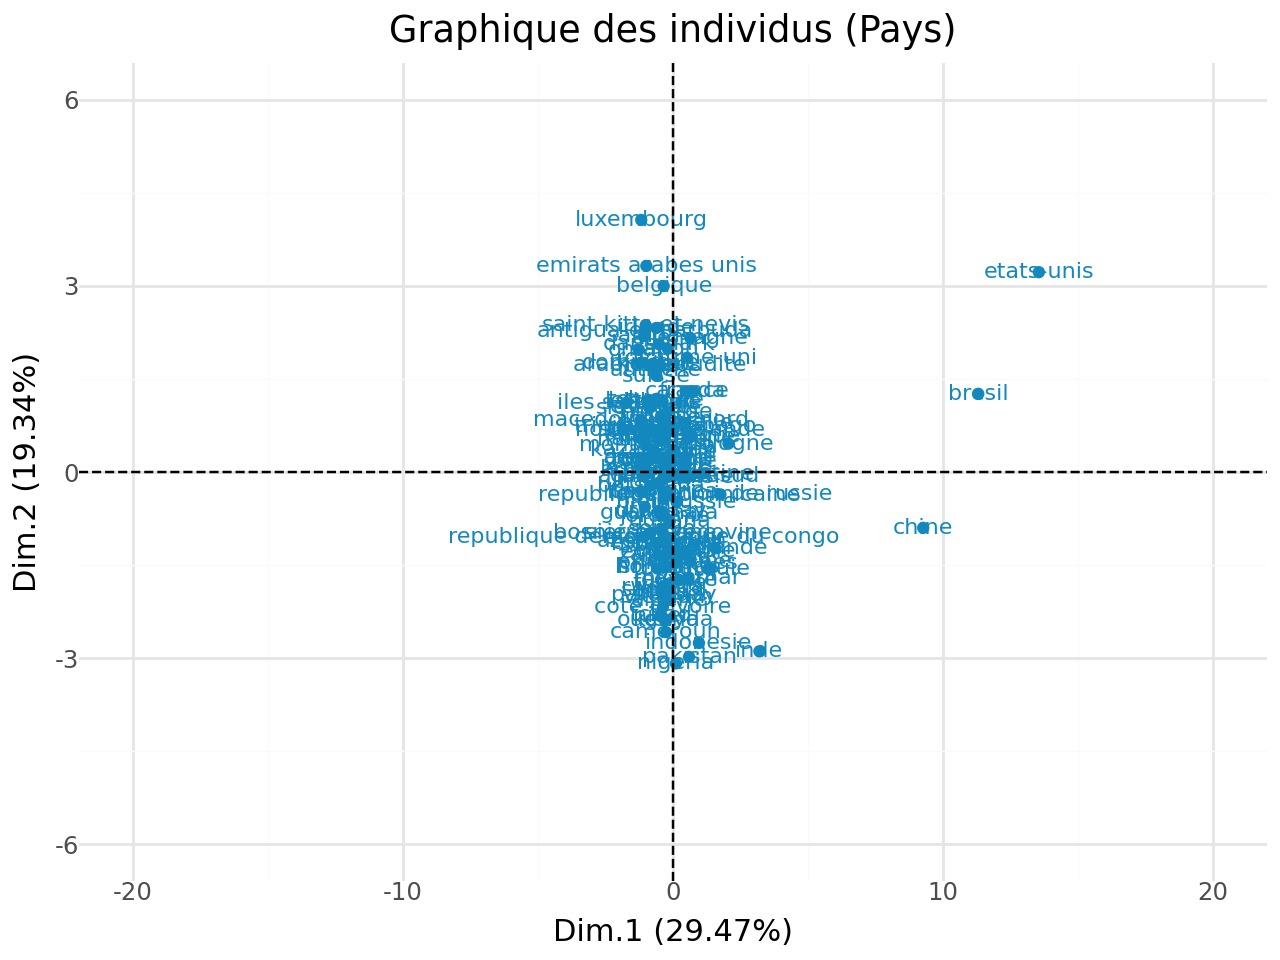

In [20]:
# Carte des individus
from scientisttools import fviz_pca_ind
from plotnine import ggtitle, xlim, ylim

# Générer le graphique initial
p = fviz_pca_ind(
    res_pca,
    axis=[0, 1],
    color="#1288BE",
    marker="o",  # Choix des axes principaux
    geom=["point", "text"],
)

# Ajouter des limites aux axes et un titre personnalisé
p = (
    p
    + xlim(-20, 20)  # Limite de l'axe des abscisses
    + ylim(-6, 6)  # Limite de l'axe des ordonnées
    + ggtitle("Graphique des individus (Pays)")
)

# Afficher le graphique
print(p)

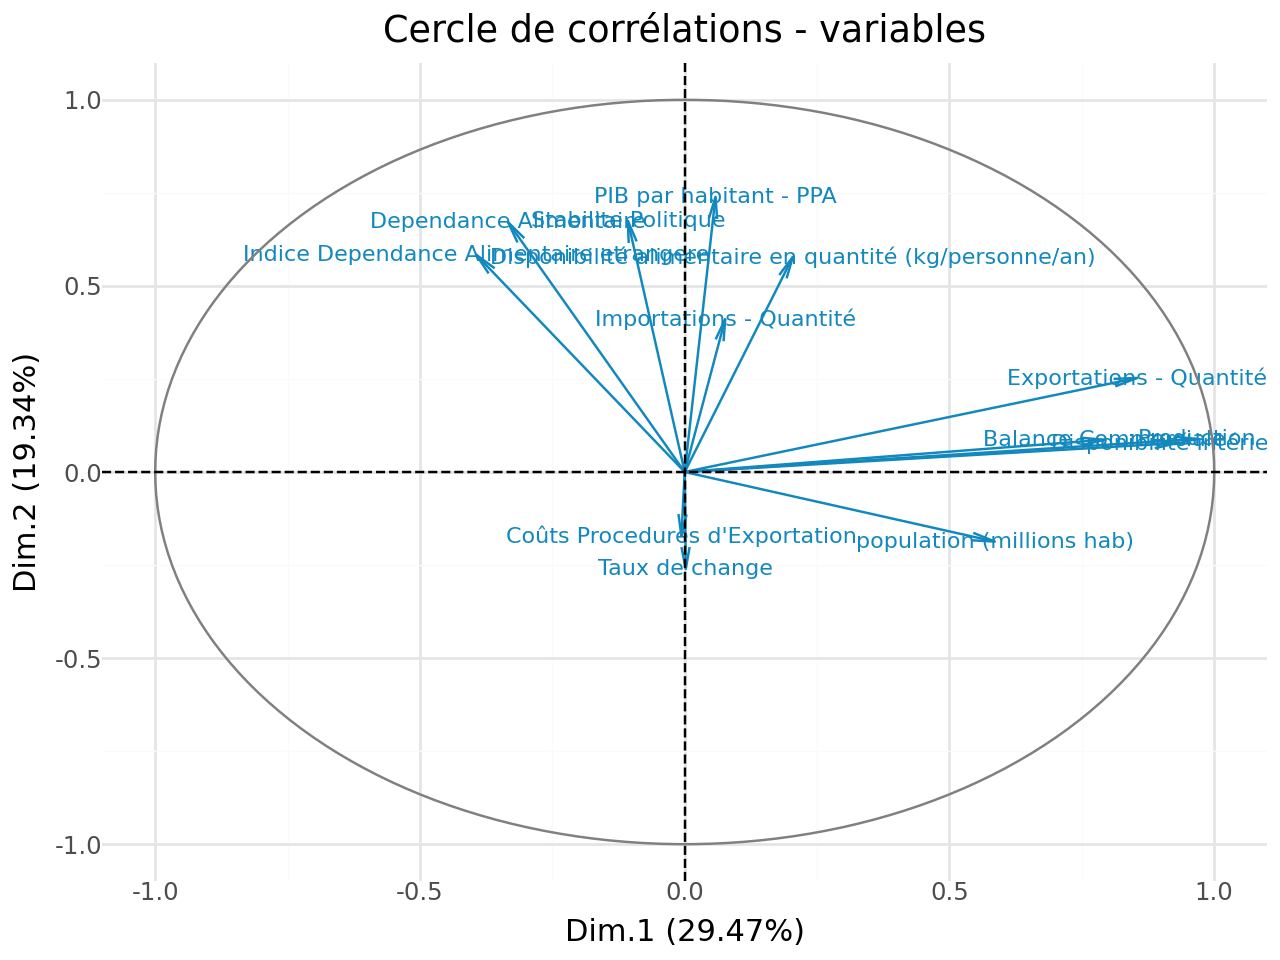

<Figure size 1000x800 with 0 Axes>

In [21]:
# Cercle des corrélations
from scientisttools import fviz_pca_var

plt.figure(figsize=(10, 8))
fviz_pca_var(
    res_pca, axis=[0, 1], title="Cercle de corrélations - variables", color="#1288BE"
)

<h4 style="margin: auto; padding: 20px; color: #000000; ">Graphes sur les dimensions 1 et 2 </h4>
</div>

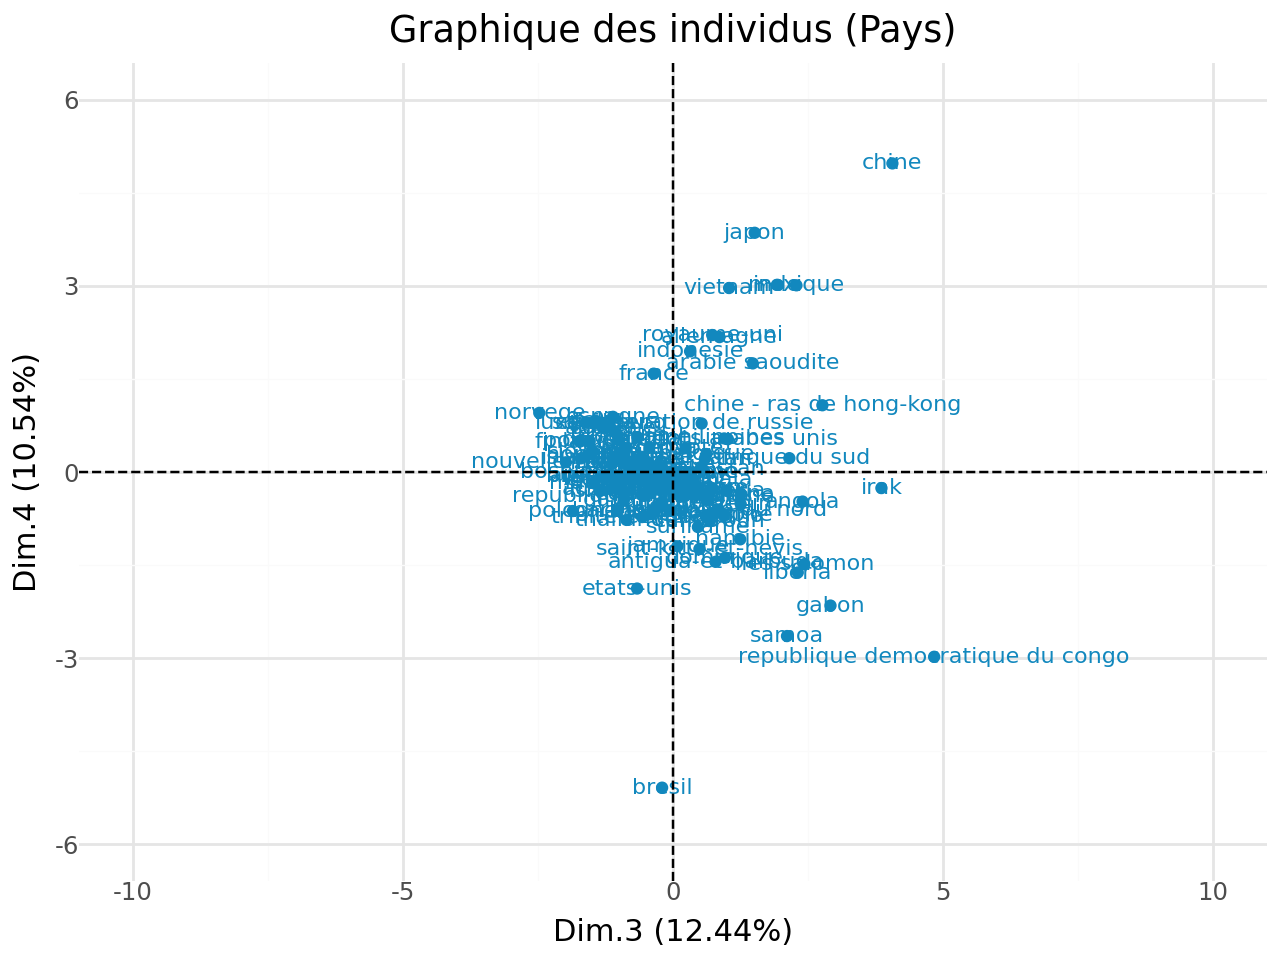

In [22]:
from plotnine import ggtitle, xlim, ylim

# Générer le graphique initial
p = fviz_pca_ind(
    res_pca, axis=[2, 3], color="#1288BE", marker="o"  # Choix des axes principaux
)

# Ajouter des limites aux axes et un titre personnalisé
p = (
    p
    + xlim(-10, 10)  # Limite de l'axe des abscisses
    + ylim(-6, 6)  # Limite de l'axe des ordonnées
    + ggtitle("Graphique des individus (Pays)")
)

# Afficher le graphique
print(p)

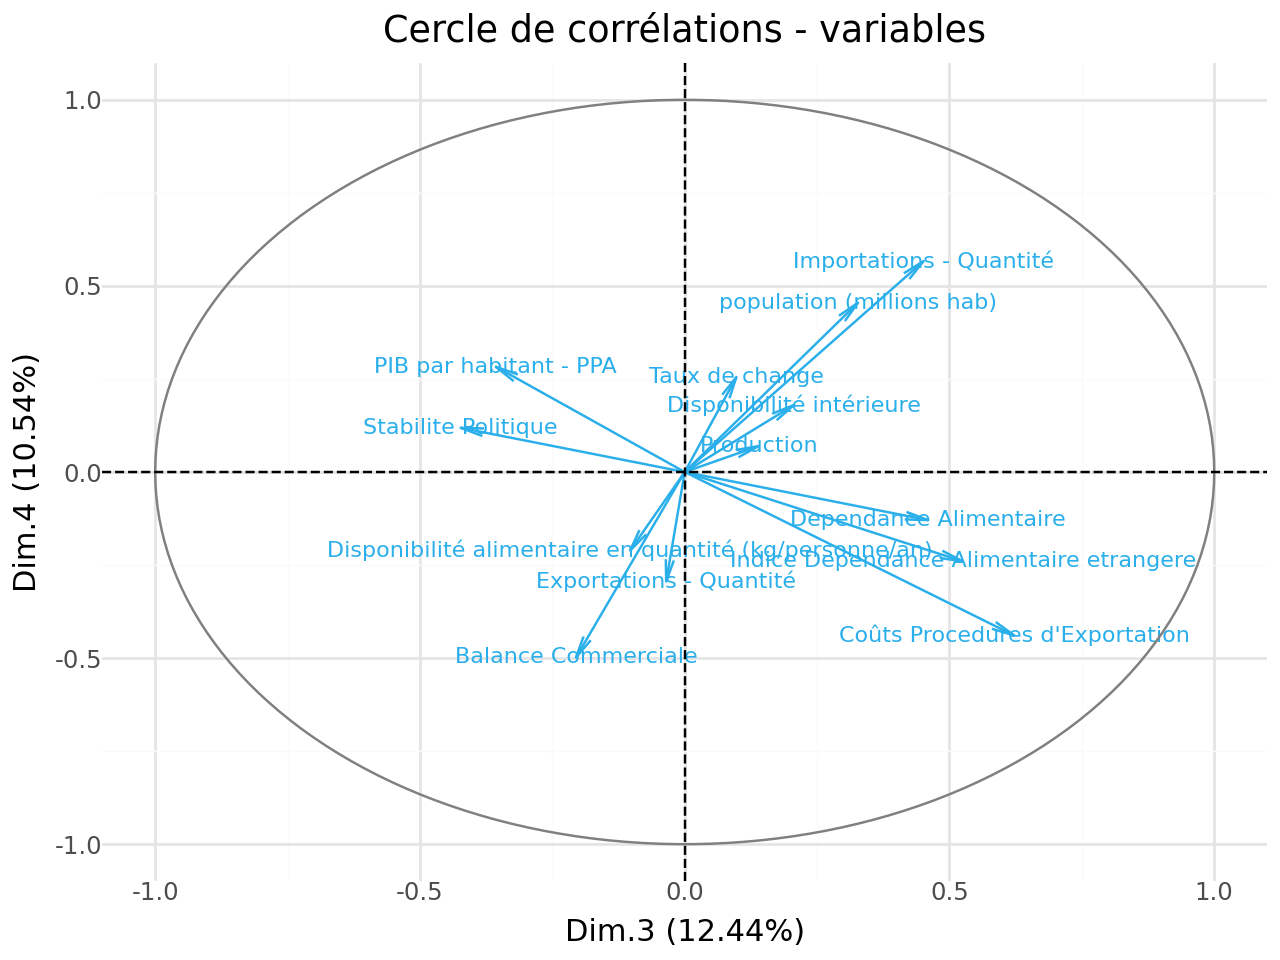

<Figure size 1000x800 with 0 Axes>

In [23]:
# Afficher le cercle des corrélations (axes 3 et 4")
plt.figure(figsize=(10, 8))
fviz_pca_var(
    res_pca, axis=[2, 3], title="Cercle de corrélations - variables", color="#2AAFEB"
)

<h4 style="margin: auto; padding: 20px; color: #000000; ">Graphes des contributions </h4>
</div>

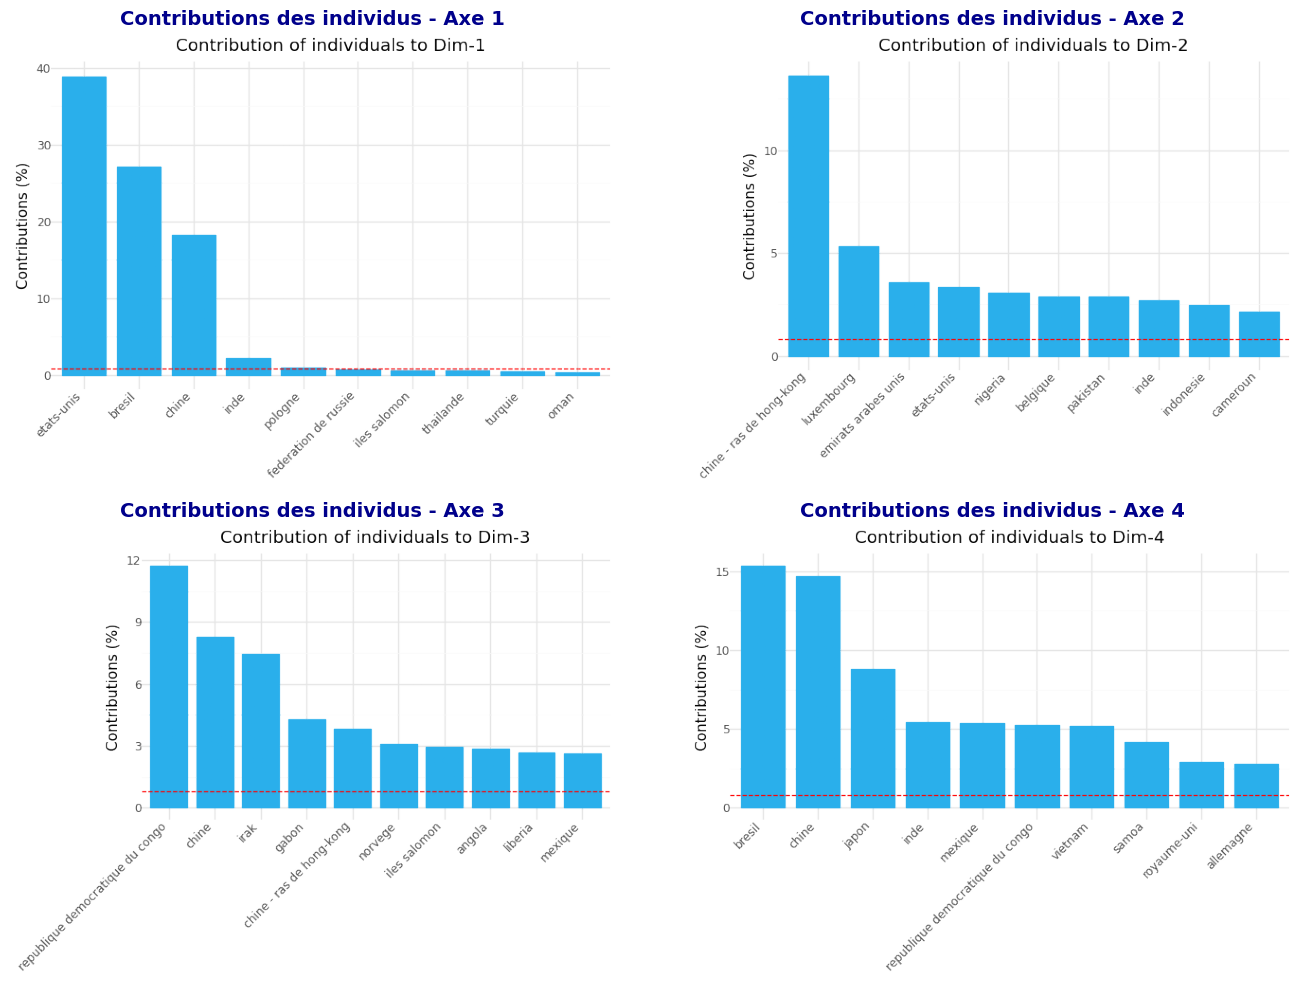

In [24]:
from scientisttools import fviz_contrib


# Afficher le Top 10 des pays qui contribuent le plus à la construction de chacun des 4
def plot_pca_contrib(
    res_pca, top_contrib=10, fill_color="steelblue", color="steelblue"
):
    """
    Affiche les graphiques des contributions des individus pour les 4 premiers axes de la PCA.

    Args:
    res_pca (PCA): L'objet résultat de la PCA.
    top_contrib (int): Le nombre de contributions principales à afficher.
    fill_color (str): La couleur de remplissage des barres.
    color (str): La couleur des barres.
    """
    # Créer un subplot 2x2
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Aplatir la matrice d'axes pour itérer facilement

    # Définir des titres personnalisés
    titles = [
        "Contributions des individus - Axe 1",
        "Contributions des individus - Axe 2",
        "Contributions des individus - Axe 3",
        "Contributions des individus - Axe 4",
    ]

    # Générer les graphiques pour les axes principaux 0, 1, 2 et 3
    for i, ax in enumerate(axes):
        # Utiliser fviz_contrib pour générer le graphique pour l'axe i
        p = fviz_contrib(
            res_pca,
            axis=i,  # Axe principal (0, 1, 2 ou 3)
            choice="ind",
            top_contrib=top_contrib,
            fill_color="#2AAFEB",
            color="#2AAFEB",
        )

        # Sauvegarder le graphique dans un fichier temporaire
        temp_filename = f"temp_pca_contrib_axis_{i}.png"
        p.save(temp_filename)  # Sauvegarder en tant que fichier PNG

        # Lire et afficher l'image sauvegardée
        img = plt.imread(temp_filename)
        ax.imshow(img)  # Afficher l'image dans le subplot correspondant
        ax.axis("off")  # Enlever les axes pour une meilleure présentation
        ax.set_title(
            titles[i], fontsize=14, fontweight="bold", color="darkblue"
        )  # Titre personnalisé

    # Ajuster l'espacement des subplots pour une meilleure présentation
    plt.tight_layout()
    plt.show()


# Utilisation de la fonction avec les résultats de la PCA
plot_pca_contrib(res_pca)

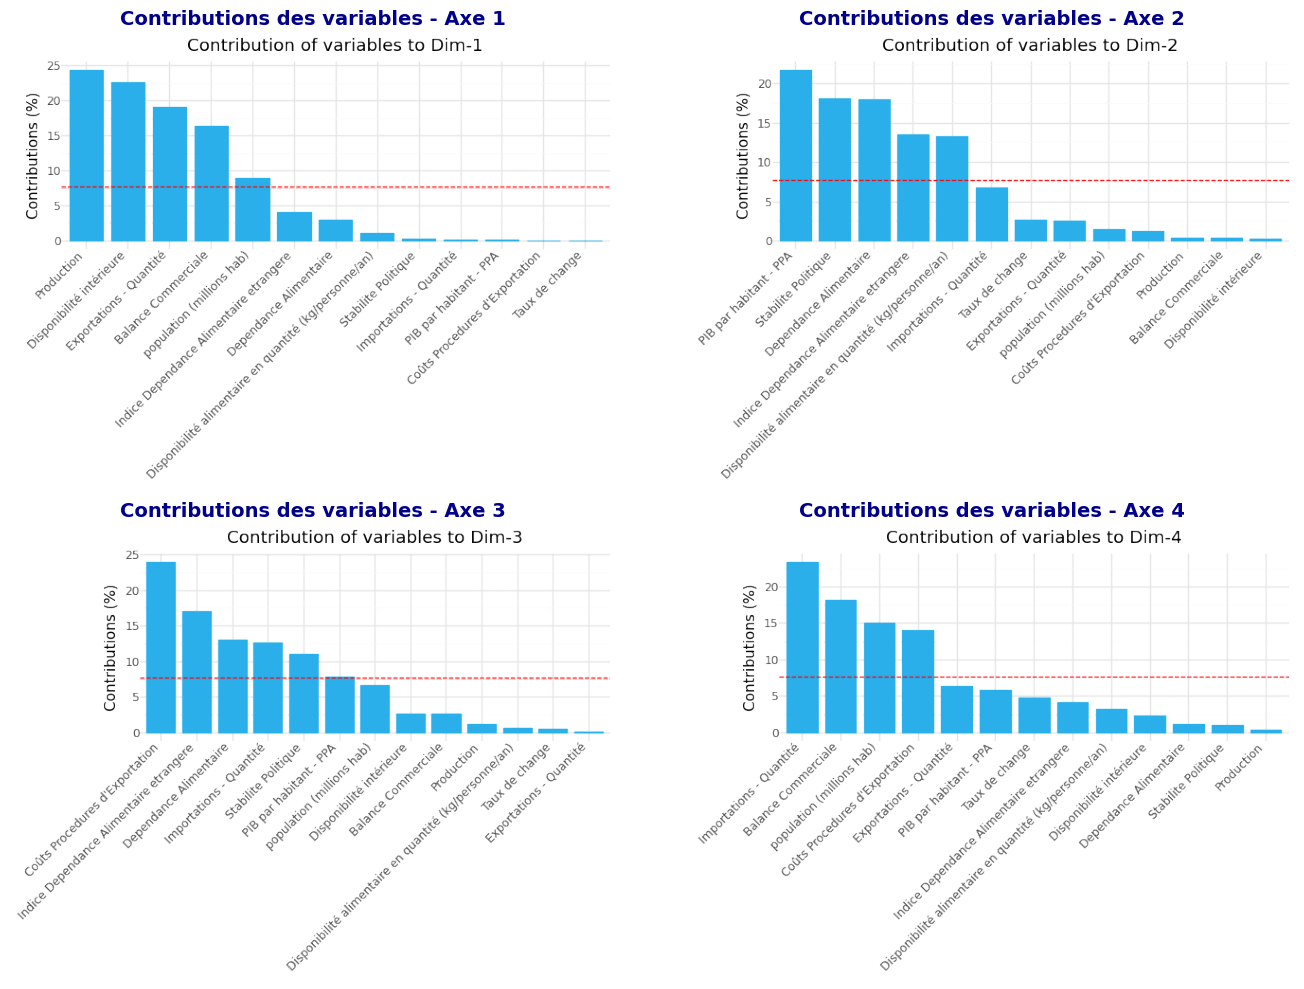

In [25]:
# Afficher le Top 10 des variables qui contribuent le plus à la construction de chacun des 4 axes
def plot_pca_contrib(res_pca, top_contrib="", fill_color="#2AAFEB", color="#2AAFEB"):
    """
    Affiche les graphiques des contributions des individus pour les 4 premiers axes de la PCA.

    Args:
    res_pca (PCA): L'objet résultat de la PCA.
    top_contrib (int): Le nombre de contributions principales à afficher.
    fill_color (str): La couleur de remplissage des barres.
    color (str): La couleur des barres.
    """
    # Créer un subplot 2x2
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Aplatir la matrice d'axes pour itérer facilement

    # Définir des titres personnalisés
    titles = [
        "Contributions des variables - Axe 1",
        "Contributions des variables - Axe 2",
        "Contributions des variables - Axe 3",
        "Contributions des variables - Axe 4",
    ]

    # Générer les graphiques pour les axes principaux 0, 1, 2 et 3
    for i, ax in enumerate(axes):
        # Utiliser fviz_contrib pour générer le graphique pour l'axe i
        p = fviz_contrib(
            res_pca,
            axis=i,  # Axe principal (0, 1, 2 ou 3)
            choice="var",
            top_contrib=None,
            fill_color="#2AAFEB",
            color="#2AAFEB",
        )

        # Sauvegarder le graphique dans un fichier temporaire
        temp_filename = f"temp_pca_contrib_axis_{i}.png"
        p.save(temp_filename)  # Sauvegarder en tant que fichier PNG

        # Lire et afficher l'image sauvegardée
        img = plt.imread(temp_filename)
        ax.imshow(img)  # Afficher l'image dans le subplot correspondant
        ax.axis("off")  # Enlever les axes pour une meilleure présentation
        ax.set_title(
            titles[i], fontsize=14, fontweight="bold", color="darkblue"
        )  # Titre personnalisé

    # Ajuster l'espacement des subplots pour une meilleure présentation
    plt.tight_layout()
    plt.show()


# Utilisation de la fonction avec les résultats de la PCA
plot_pca_contrib(res_pca)

<h4 style="margin: auto; padding: 20px; color: #000000; ">Graphes des cos2 </h4>
</div>

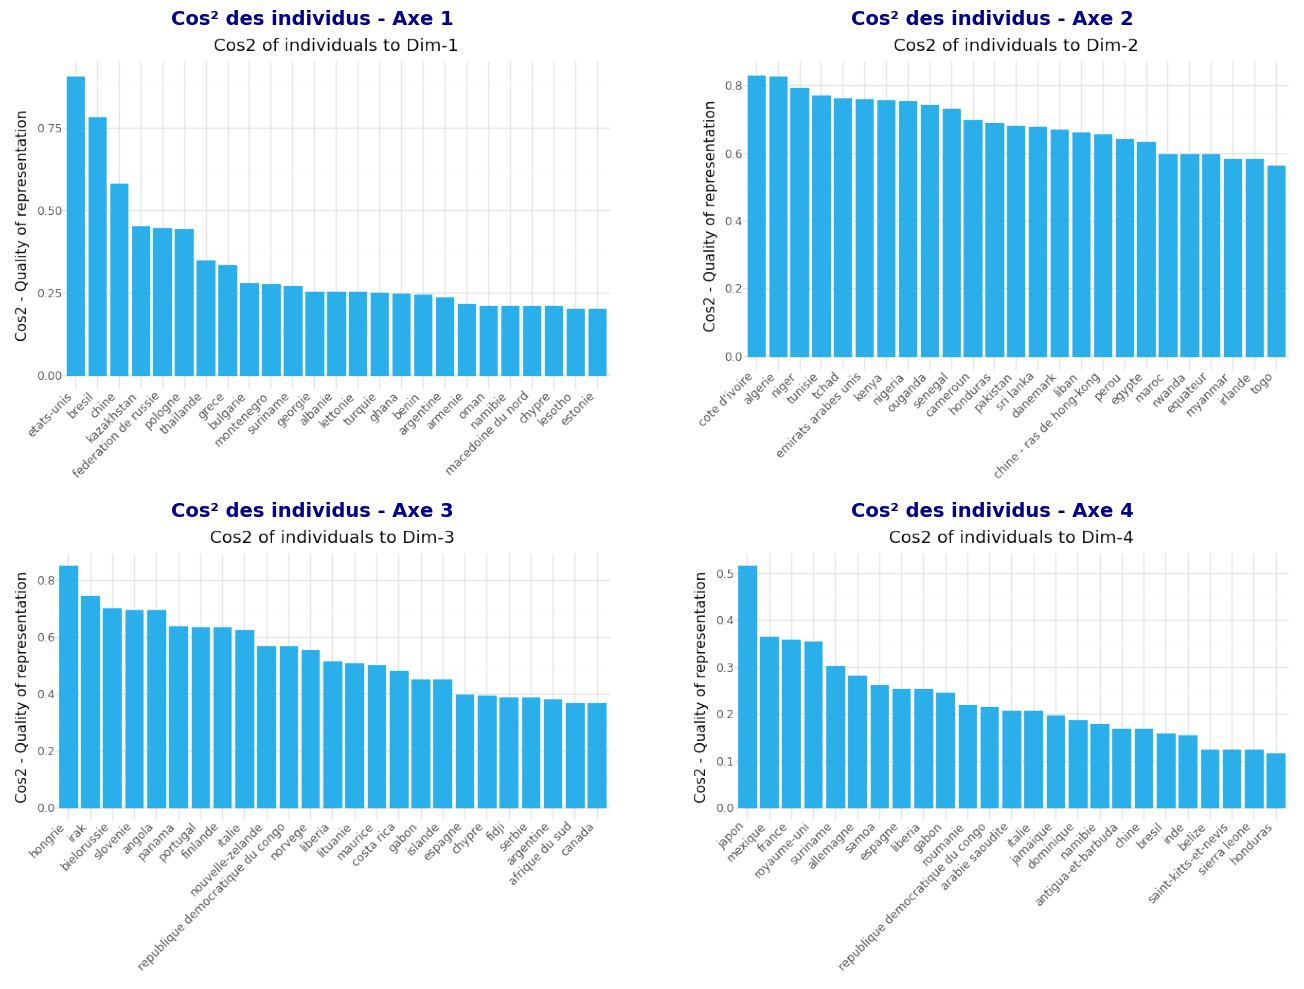

In [26]:
from scientisttools import fviz_cos2


def plot_pca_cos2(res_pca, top_cos2=25, fill_color="#2AAFEB", color="#2AAFEB"):
    """
    Affiche les graphiques des cos² des individus pour les 4 premiers axes de la PCA.

    Args:
    res_pca (PCA): L'objet résultat de la PCA.
    top_cos2 (int): Le nombre de contributions principales à afficher.
    fill_color (str): La couleur de remplissage des barres.
    color (str): La couleur des barres.
    """
    # Créer un subplot 2x2
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Aplatir la matrice d'axes pour itérer facilement

    # Définir des titres personnalisés
    titles = [
        "Cos² des individus - Axe 1",
        "Cos² des individus - Axe 2",
        "Cos² des individus - Axe 3",
        "Cos² des individus - Axe 4",
    ]

    # Générer les graphiques pour les axes principaux 0, 1, 2 et 3
    for i, ax in enumerate(axes):
        # Utiliser fviz_cos2 pour générer le graphique pour l'axe i
        p = fviz_cos2(
            res_pca,
            axis=i,  # Axe principal (0, 1, 2 ou 3)
            choice="ind",
            top_cos2=top_cos2,
            fill_color=fill_color,
            color=color,
        )

        # Sauvegarder le graphique dans un fichier temporaire
        temp_filename = f"temp_pca_cos2_axis_{i}.png"
        p.save(temp_filename)  # Sauvegarder en tant que fichier PNG

        # Lire et afficher l'image sauvegardée
        img = plt.imread(temp_filename)
        ax.imshow(img)  # Afficher l'image dans le subplot correspondant
        ax.axis("off")  # Enlever les axes pour une meilleure présentation
        ax.set_title(
            titles[i], fontsize=14, fontweight="bold", color="darkblue"
        )  # Titre personnalisé

    # Ajuster l'espacement des subplots pour une meilleure présentation
    plt.tight_layout()
    plt.show()


# Utilisation de la fonction avec les résultats de la PCA
plot_pca_cos2(res_pca)

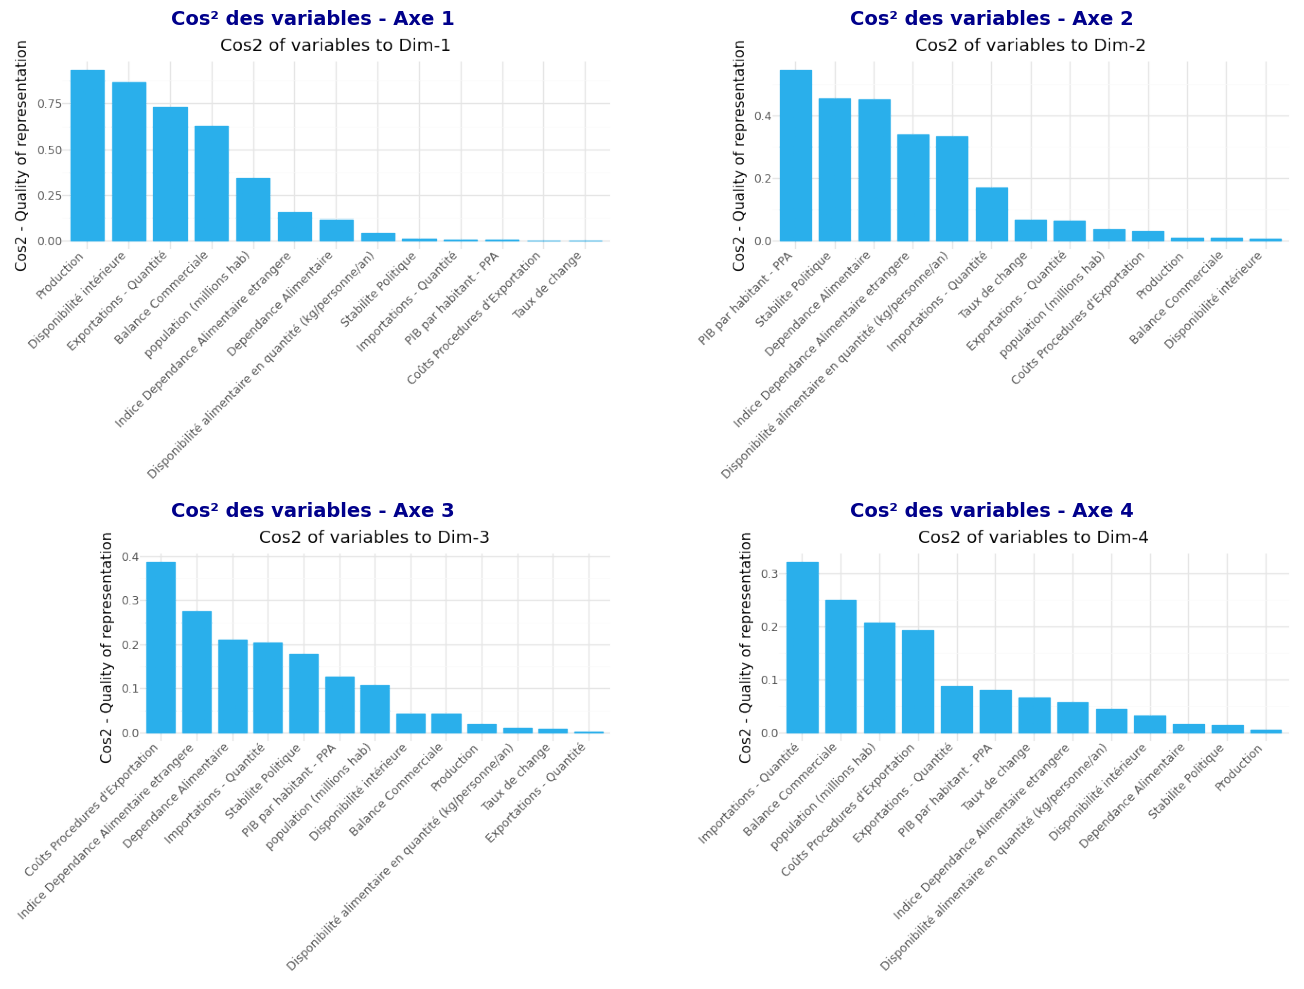

In [27]:
# Afficher les graphiques des cos2 pour des variables pour chacun des axes


def plot_pca_cos2(res_pca, top_cos2=25, fill_color="#2AAFEB", color="#2AAFEB"):
    """
    Affiche les graphiques des cos² des individus pour les 4 premiers axes de la PCA.

    Args:
    res_pca (PCA): L'objet résultat de la PCA.
    top_cos2 (int): Le nombre de contributions principales à afficher.
    fill_color (str): La couleur de remplissage des barres.
    color (str): La couleur des barres.
    """
    # Créer un subplot 2x2
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Aplatir la matrice d'axes pour itérer facilement

    # Définir des titres personnalisés
    titles = [
        "Cos² des variables - Axe 1",
        "Cos² des variables - Axe 2",
        "Cos² des variables - Axe 3",
        "Cos² des variables - Axe 4",
    ]

    # Générer les graphiques pour les axes principaux 0, 1, 2 et 3
    for i, ax in enumerate(axes):
        # Utiliser fviz_cos2 pour générer le graphique pour l'axe i
        p = fviz_cos2(
            res_pca,
            axis=i,  # Axe principal (0, 1, 2 ou 3)
            choice="var",
            top_cos2=top_cos2,
            fill_color=fill_color,
            color=color,
        )

        # Sauvegarder le graphique dans un fichier temporaire
        temp_filename = f"temp_pca_cos2_axis_{i}.png"
        p.save(temp_filename)  # Sauvegarder en tant que fichier PNG

        # Lire et afficher l'image sauvegardée
        img = plt.imread(temp_filename)
        ax.imshow(img)  # Afficher l'image dans le subplot correspondant
        ax.axis("off")  # Enlever les axes pour une meilleure présentation
        ax.set_title(
            titles[i], fontsize=14, fontweight="bold", color="darkblue"
        )  # Titre personnalisé

    # Ajuster l'espacement des subplots pour une meilleure présentation
    plt.tight_layout()
    plt.show()


# Utilisation de la fonction avec les résultats de la PCA
plot_pca_cos2(res_pca)

<div style="background-color: #000000;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Clustering</h2>
</div>

<h3 style="margin: auto; padding: 20px; color: #000000; ">3.1 - Classification Ascendante Hiérarchique</h3>
</div>

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.1.1 Préparer les données</h4>
</div>

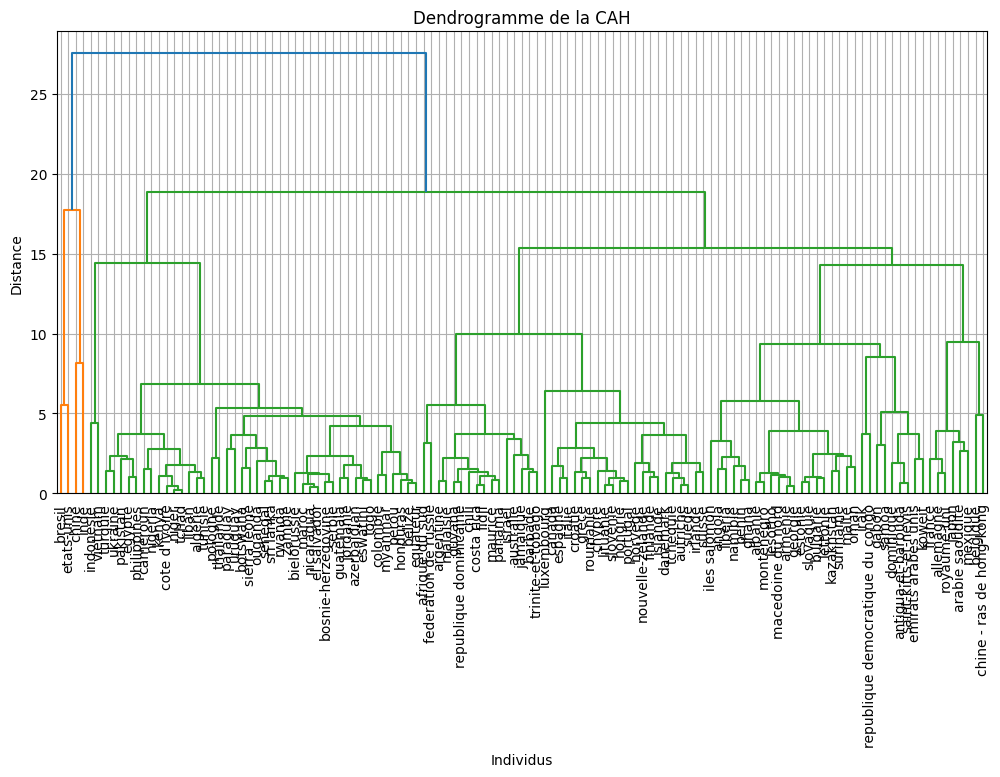

In [28]:
from scientisttools import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Extraire les coordonnées des individus
data_for_cah = res_pca.ind_["coord"].iloc[:, :4]

In [ ]:
# Calcul de la matrice de liaison pour créer le dendrogramme
linkage_matrix = linkage(data_for_cah, method="ward", metric="euclidean")

# Visualisation du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    labels=df_poule_qui_chante.index,
    leaf_rotation=90,
    leaf_font_size=10,
)
plt.title("Dendrogramme de la CAH")
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.1.2 Déterminer le nombre optimal de clusters</h4>
</div>

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Tester différents nombres de clusters
for n_clusters in range(2, 10):  # Tester 2 à 9 clusters
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = model.fit_predict(
        data_for_cah
    )  # Appliquer le clustering sur les coordonnées PCA
    score = silhouette_score(data_for_cah, labels)  # Calculer le silhouette score
    print(f"Silhouette Score pour {n_clusters} clusters: {score}")

Silhouette Score pour 2 clusters: 0.764131647461129
Silhouette Score pour 3 clusters: 0.26859563892566035
Silhouette Score pour 4 clusters: 0.29384999201254486
Silhouette Score pour 5 clusters: 0.2959902056084808
Silhouette Score pour 6 clusters: 0.31732653422408474
Silhouette Score pour 7 clusters: 0.2440310337697524
Silhouette Score pour 8 clusters: 0.2671256723421591
Silhouette Score pour 9 clusters: 0.28827746828430817


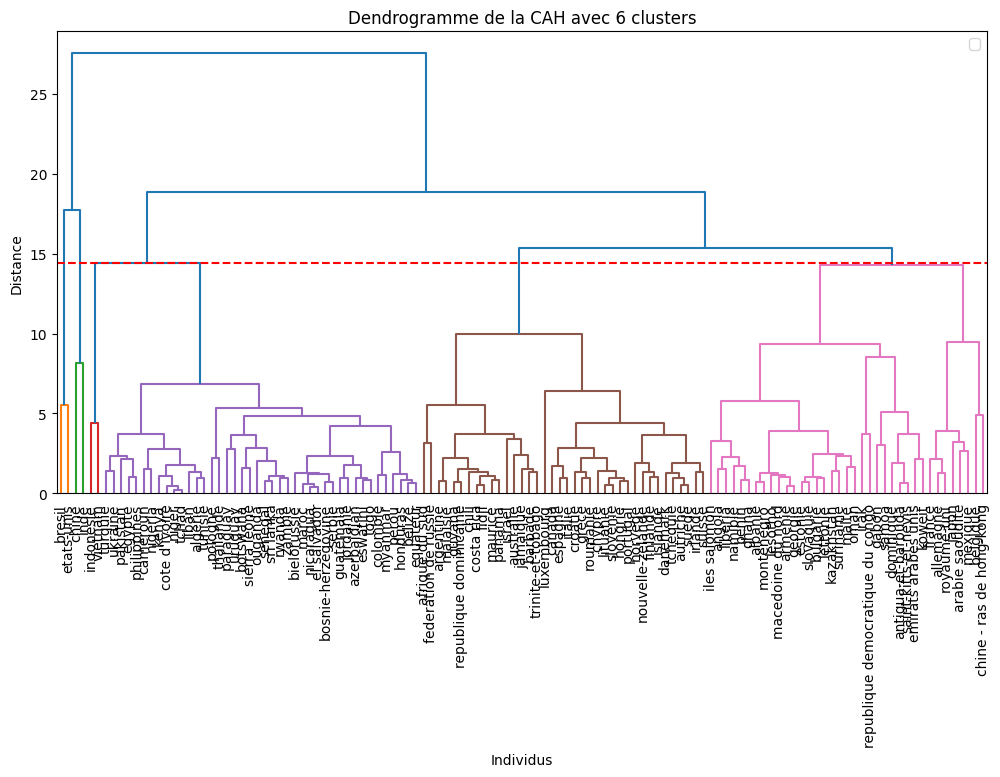

In [30]:
from scientisttools import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Calcul de la matrice de liaison pour créer le dendrogramme
linkage_matrix = linkage(data_for_cah, method="ward", metric="euclidean")

# Visualisation du dendrogramme avec coloration des clusters
plt.figure(figsize=(12, 6))

# Définir le nombre de clusters souhaité
n_clusters = 5
color_threshold = linkage_matrix[-n_clusters, 2]  # Hauteur pour séparer en `n_clusters`

# Dendrogramme avec coloration
dendrogram(
    linkage_matrix,
    labels=df_poule_qui_chante.index,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=color_threshold,  # Coloration des branches
)
plt.title("Dendrogramme de la CAH avec 6 clusters")
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.axhline(y=color_threshold, color="red", linestyle="--")
plt.legend()
plt.show()

# Étape 3 : Attribution des clusters
clusters = fcluster(linkage_matrix, n_clusters, criterion="maxclust")
df_poule_qui_chante["Cluster"] = clusters

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.1.3 Exécuter l'algorithme</h4>
</div>

In [31]:
# Création du modèle de CAH (avec 6 clusters) et fixer les résultats
from numpy.random import seed

seed(123)


n_clusters = 6  # Choisir le nombre de clusters


model_cah = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")


labels = model_cah.fit_predict(data_for_cah)


# Ajout des clusters au DataFrame original


df_poule_qui_chante["Cluster"] = labels

In [32]:
# Calculer le nombre d'individus par cluster
nombre_individus_par_cluster = (
    df_poule_qui_chante["Cluster"].value_counts().sort_index()
)

# Afficher le résultat
print("Nombre d'individus par cluster :")
print(nombre_individus_par_cluster)

Nombre d'individus par cluster :
Cluster
0    59
1    14
2    39
3     2
4     1
5     8
Name: count, dtype: int64


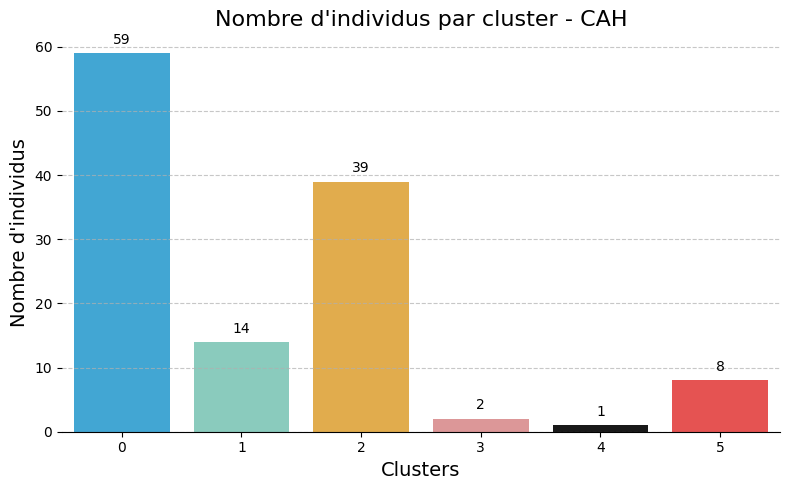

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

plt.figure(figsize=(8, 5))

# Tracer les barres
ax = sns.barplot(
    x=nombre_individus_par_cluster.index,
    y=nombre_individus_par_cluster.values,
    palette=custom_palette,
)

# Ajouter des étiquettes de données au-dessus de chaque barre
for i, value in enumerate(nombre_individus_par_cluster.values):
    ax.text(
        i,  # Position en x (indice de la barre)
        value + 1,  # Position en y (légèrement au-dessus de la barre)
        f"{value}",  # Texte à afficher
        ha="center",  # Aligner horizontalement
        va="bottom",  # Aligner verticalement
        fontsize=10,  # Taille de la police
        color="black",  # Couleur du texte
    )

# Personnalisation des bordures
ax.spines["top"].set_visible(False)  # Enlever la bordure du haut
ax.spines["right"].set_visible(False)  # Enlever la bordure de droite
ax.spines["left"].set_visible(False)  # Enlever la bordure de gauche

# Ajouter des détails au graphique
plt.title("Nombre d'individus par cluster - CAH", fontsize=16)
plt.xlabel("Clusters", fontsize=14)
plt.ylabel("Nombre d'individus", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [34]:
# Grouper les individus par cluster
individus_par_cluster = df_poule_qui_chante.groupby("Cluster").apply(
    lambda x: x.index.tolist()
)

# Afficher les résultats
for cluster, individus in individus_par_cluster.items():
    print(f"Cluster {cluster} :")
    print(individus)
    print()

Cluster 0 :
['albanie', 'argentine', 'armenie', 'australie', 'autriche', 'barbade', 'benin', 'bielorussie', 'botswana', 'bulgarie', 'canada', 'chili', 'chypre', 'costa rica', 'croatie', 'danemark', 'espagne', 'estonie', 'fidji', 'finlande', 'france', 'georgie', 'ghana', 'grece', 'guatemala', 'guyana', 'hongrie', 'irlande', 'islande', 'israel', 'italie', 'jamaique', 'jordanie', 'kazakhstan', 'lesotho', 'lettonie', 'lituanie', 'macedoine du nord', 'malaisie', 'malte', 'maurice', 'montenegro', 'namibie', 'norvege', 'nouvelle-zelande', 'panama', 'pologne', 'portugal', 'republique dominicaine', 'roumanie', 'sierra leone', 'slovaquie', 'slovenie', 'suede', 'suisse', 'suriname', 'tchequie', 'trinite-et-tobago', 'uruguay']

Cluster 1 :
['allemagne', 'antigua-et-barbuda', 'arabie saoudite', 'belgique', 'chine - ras de hong-kong', 'dominique', 'emirats arabes unis', 'japon', 'koweit', 'luxembourg', 'mexique', 'oman', 'royaume-uni', 'saint-kitts-et-nevis']

Cluster 2 :
['algerie', 'azerbaidjan', 

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.1.4 Interpréter les résultats</h4>
</div>

In [35]:
# Moyennes conditionnelles par cluster
cah_moyennes_conditionnelles = df_poule_qui_chante.groupby("Cluster").mean()

# Résultats des clusters
print("\nMoyennes conditionnelles par cluster - CAH :")
cah_moyennes_conditionnelles.head(7)


Moyennes conditionnelles par cluster - CAH :


Stabilite Politique  Coûts Procedures d'Exportation  \
Cluster                                                        
0                   0.472542                      239.442881   
1                   0.517143                      328.422857   
2                  -0.730000                      378.693846   
3                  -0.040000                      518.480000   
4                  -0.230000                      484.140000   
5                  -0.543750                     1274.756250   

         population (millions hab)  \
Cluster                              
0                     1.129616e+07   
1                     3.375095e+07   
2                     8.172050e+07   
3                     2.664593e+08   
4                     1.421022e+09   
5                     1.713605e+07   

         Disponibilité alimentaire en quantité (kg/personne/an)  \
Cluster                                                           
0                                                25.554068        
1                                                34.763571        
2                                                12.013333        
3                                                51.855000        
4                                                12.330000        
5                                                23.993750        

         Importations - Quantité    Production  Exportations - Quantité  \
Cluster                                                                   
0                      62.254237    346.000000                62.423729   
1                     453.642857    714.714286               176.285714   
2                      33.051282    716.358974                42.615385   
3                      63.000000  18057.500000              3957.500000   
4                     452.000000  18236.000000               576.000000   
5                     189.000000    228.875000                 7.875000   

         Disponibilité intérieure  Taux de change  PIB par habitant - PPA  \
Cluster                                                                     
0                      322.084746       64.192300            33819.967797   
1                      943.928571       11.323491            51637.650000   
2                      705.692308     1445.041672            11032.866667   
3                    14124.000000        2.095695            41625.500000   
4                    18161.000000        6.758755            16461.100000   
5                      407.375000      317.000625             9675.612500   

         Indice Dependance Alimentaire etrangere  Balance Commerciale  \
Cluster                                                                 
0                                       0.321751             0.169492   
1                                       0.693345          -277.357143   
2                                       0.069800             9.564103   
3                                       0.002896          3894.500000   
4                                       0.024187           124.000000   
5                                       0.822905          -181.125000   

         Dependance Alimentaire  
Cluster                          
0                      0.399096  
1                      1.025224  
2                      0.074230  
3                      0.003517  
4                      0.024888  
5                      0.994319

**Caractéristiques de chaque cluster.**

**Cluster 0 :**
- Stabilité politique : Moyenne positive (0.47), indiquant une stabilité politique modérée.
- Coûts des procédures d'exportation : Relativement faibles (239).
- Population : Population moyenne (11 millions d'habitants).
- Disponibilité alimentaire : Très faible (25 kg/personne/an), montrant une disponibilité alimentaire limitée.
- PIB par habitant (PPA) : Relativement élevé (33,819), indiquant une économie assez développée.
- Dépendance alimentaire étrangère : Moyenne (32%), avec un équilibre relatif dans la balance commerciale.

Profil : Petits pays stables avec des économies relativement prospères, mais une faible autosuffisance alimentaire.

**Cluster 1 :**
- Stabilité politique : Moyenne positive (0.51), similaire au Cluster 0.
- Coûts des procédures d'exportation : Plus élevés (328), indiquant des barrières modérées.
- Population : Moyenne supérieure (33 millions d'habitants).
- Disponibilité alimentaire : Modérée (34 kg/personne/an).
- PIB par habitant (PPA) : Élevé (51,637), indiquant des économies avancées.
- Dépendance alimentaire étrangère : Élevée (69%), avec une balance commerciale déficitaire (-277).

Profil : Pays développés, mais avec une forte dépendance alimentaire extérieure et des coûts d’exportation plus élevés.

**Cluster 2 :**
- Stabilité politique : Moyenne négative (-0.73), montrant des instabilités politiques.
- Population : Grande population (81 millions d'habitants).
- Disponibilité alimentaire : Faible (12 kg/personne/an).
- Taux de change : Très élevé (1,445), suggérant des économies avec des devises dévaluées.
- PIB par habitant (PPA) : Faible (11,032).
- Dépendance alimentaire étrangère : Très faible (7%).

Profil : Pays émergents ou en développement avec de grandes populations, des économies instables, et une faible autosuffisance alimentaire.

**Cluster 3 :**
- Stabilité politique : Légèrement négative (-0.04).
- Population : Très grande population (266 millions d'habitants).
- Disponibilité alimentaire : Élevée (51 kg/personne/an).
- Production : Extrêmement élevée (18,057).
- Exportations : Élevées (3,957).
- PIB par habitant (PPA) : Élevé (41,625).
- Dépendance alimentaire étrangère : Quasi nulle (0.3%).

Profil : Grands pays exportateurs avec des ressources agricoles abondantes et une autosuffisance alimentaire élevée.

**Cluster 4 :**
- Stabilité politique : Moyenne négative (-0.23).
- Population : Immense (1.4 milliard d'habitants).
- Production : Très élevée (18,236).
- Exportations : Modérées (576).
- PIB par habitant (PPA) : Moyen (16,461).
- Dépendance alimentaire étrangère : Très faible (2%).

Profil : Pays extrêmement peuplés, avec une production alimentaire conséquente mais une consommation par habitant faible.

**Cluster 5 :**
- Stabilité politique : Moyenne négative (-0.54), avec des instabilités majeures.
- Coûts des procédures d'exportation : Extrêmement élevés (1,274), indiquant des obstacles significatifs au commerce.
- Population : Faible (17 millions d'habitants).
- PIB par habitant (PPA) : Très faible (9,675).
- Dépendance alimentaire étrangère : Très élevée (82%), avec une balance commerciale déficitaire (-181).

Profil : Petits pays en difficulté économique, dépendants des importations alimentaires, et confrontés à des barrières commerciales importantes.

Graphiques Boxplot des moyennes de chaques variables pour chaque clusters

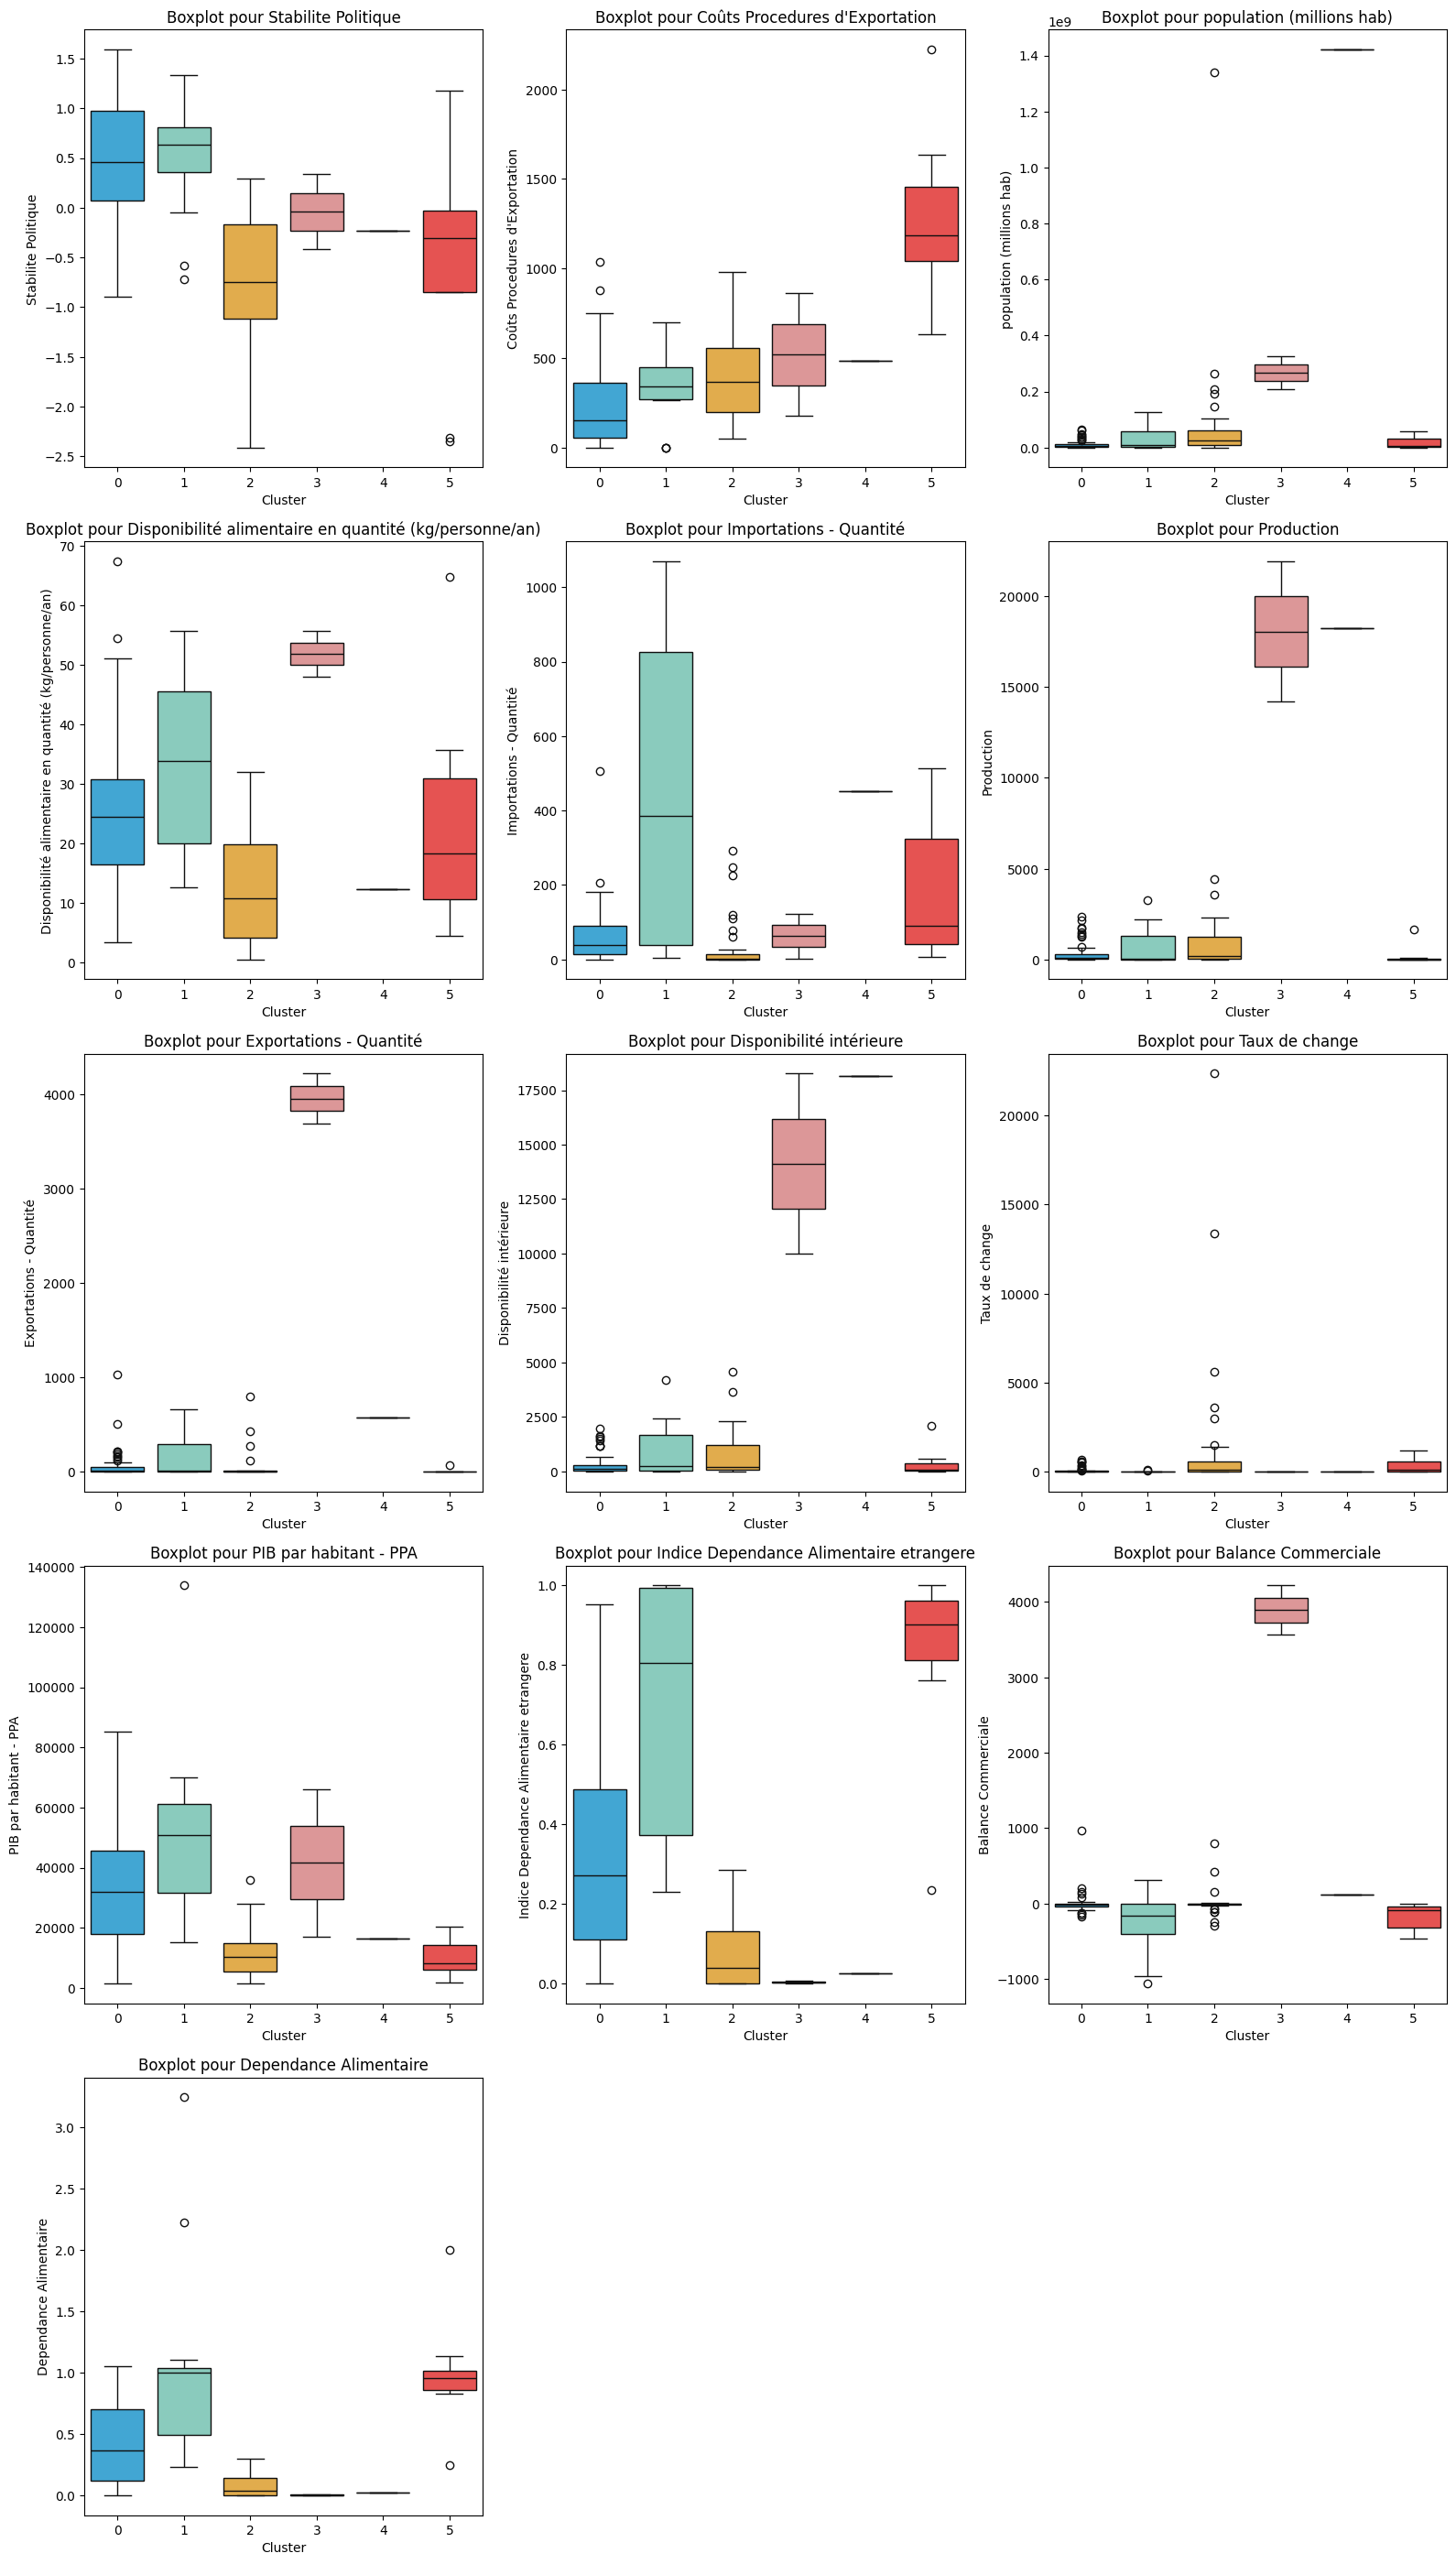

In [36]:
variables = cah_moyennes_conditionnelles.columns  # Toutes les colonnes sauf "Cluster"
n_variables = len(variables)

# Étape 3 : Configuration des sous-graphiques
fig, axes = plt.subplots(
    nrows=(n_variables + 1) // 2, ncols=3, figsize=(16, n_variables * 3)
)
axes = axes.flatten()  # Pour itérer facilement sur les axes

# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Étape 4 : Tracer les boxplots
for i, var in enumerate(variables):
    # Créer un DataFrame temporaire pour le boxplot
    temp_df = df_poule_qui_chante[["Cluster", var]].copy()

    sns.boxplot(
        data=temp_df,
        x="Cluster",
        y=var,
        ax=axes[i],
        palette=custom_palette[:n_clusters],  # Limiter à n_clusters couleurs
    )
    axes[i].set_title(f"Boxplot pour {var}")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(var)

# Masquer les axes inutilisés si le nombre de variables est impair
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajustement de la disposition
plt.tight_layout()
plt.show()

**Description de chaque cluster par les variables quantitatives**

**Eta² :**

- Plus la valeur de eta² est proche de 1, plus la variable est fortement discriminante entre les clusters.
-  eta² est faible (proche de 0), cela signifie que cette variable contribue peu à expliquer les différences entre les clusters.

**P-value :**

- Une p-value < 0,05 indique que les moyennes de la variable sont significativement différentes entre les clusters.
- Si la p-value est grande, cela signifie que les différences entre les clusters pour cette variable pourraient être dues au hasard.

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Récupérer les variables et les clusters
variables = df_poule_qui_chante.drop(columns=["Cluster"])  # Exclure les clusters
clusters = df_poule_qui_chante["Cluster"]

# Liste pour stocker les résultats
results_list = []

# Calcul des eta² et p-values pour chaque variable
for var in variables.columns:
    data_var = df_poule_qui_chante[var]

    # Séparer les valeurs par cluster
    cluster_groups = [data_var[clusters == c] for c in np.unique(clusters)]

    # ANOVA pour obtenir la p-value
    f_stat, p_value = f_oneway(*cluster_groups)

    # Calcul de l'eta²
    overall_mean = data_var.mean()
    ss_total = np.sum((data_var - overall_mean) ** 2)  # Somme des carrés totale
    ss_between = np.sum(
        [len(group) * (group.mean() - overall_mean) ** 2 for group in cluster_groups]
    )  # Somme des carrés inter-clusters
    eta_squared = ss_between / ss_total

    # Ajouter les résultats à la liste
    results_list.append({"Variable": var, "Eta2": eta_squared, "P-value": p_value})

# Convertir la liste en DataFrame
results = pd.DataFrame(results_list)

# Trier les résultats par importance de eta²
results = results.sort_values(by="Eta2", ascending=False)

# Affichage des résultats
print(results)

                                             Variable      Eta2       P-value
6                             Exportations - Quantité  0.900811  5.850893e-57
5                                          Production  0.895850  1.008000e-55
11                                Balance Commerciale  0.872081  1.618006e-50
7                            Disponibilité intérieure  0.855427  2.023092e-47
2                           population (millions hab)  0.538073  3.342364e-18
10            Indice Dependance Alimentaire etrangere  0.525955  1.470813e-17
1                      Coûts Procedures d'Exportation  0.494385  5.842474e-16
12                             Dependance Alimentaire  0.445560  1.104700e-13
0                                 Stabilite Politique  0.445002  1.169568e-13
4                             Importations - Quantité  0.416616  1.968047e-12
9                              PIB par habitant - PPA  0.388185  2.876415e-11
3   Disponibilité alimentaire en quantité (kg/pers...  0.326853 

**Interprétation des résultats**

**Calcul des moyennes conditionnelles et globales :**

- Moyenne dans chaque cluster (Mean in category).
- Moyenne globale pour chaque variable (Overall mean).

**Calcul des écarts-types :**

- Écart-type dans chaque cluster (SD in category).
- Écart-type global (Overall SD).

**Calcul du V-Test et de la p-valeur :**

- Le V-Test mesure la contribution d'une variable dans un cluster.
- La p-valeur évalue la significativité de cette contribution.

In [38]:
from scipy.stats import norm


# Initialisation d'un DataFrame pour les résultats
variables = df_poule_qui_chante.columns.drop(
    "Cluster"
)  # Exclure la colonne des clusters
results = []

# Calcul pour chaque variable et cluster
for var in variables:
    for cluster in sorted(df_poule_qui_chante["Cluster"].unique()):
        # Filtrage des individus du cluster
        cluster_data = df_poule_qui_chante[df_poule_qui_chante["Cluster"] == cluster]

        # Moyennes
        mean_in_category = cluster_data[var].mean()  # Moyenne dans le cluster
        overall_mean = df_poule_qui_chante[var].mean()  # Moyenne globale

        # Écarts-types
        sd_in_category = cluster_data[var].std()  # Écart-type dans le cluster
        overall_sd = df_poule_qui_chante[var].std()  # Écart-type global

        # Taille des échantillons
        n_category = len(cluster_data)
        n_total = len(df_poule_qui_chante)

        # Calcul du V-Test
        vtest = (mean_in_category - overall_mean) / (overall_sd / np.sqrt(n_category))

        # Calcul de la p-valeur
        pvalue = 2 * (1 - norm.cdf(abs(vtest)))

        # Ajout des résultats pour cette variable et ce cluster
        results.append(
            {
                "Variable": var,
                "Cluster": cluster,
                "V-Test": vtest,
                "Mean in category": mean_in_category,
                "Overall mean": overall_mean,
                "SD in category": sd_in_category,
                "Overall SD": overall_sd,
                "p-value": pvalue,
            }
        )

# Convertir les résultats en DataFrame pour une visualisation claire
results_df = pd.DataFrame(results)

# Afficher les résultats
cluster_0 = results_df.loc[results_df["Cluster"] == 0, :]
cluster_0 = cluster_0.sort_values(by="p-value", ascending=True)
cluster_0

Variable  Cluster    V-Test  \
0                                 Stabilite Politique        0  4.079199   
6                      Coûts Procedures d'Exportation        0 -2.765999   
54                             PIB par habitant - PPA        0  2.307967   
12                          population (millions hab)        0 -1.750094   
24                            Importations - Quantité        0 -1.728642   
42                           Disponibilité intérieure        0 -1.719062   
18  Disponibilité alimentaire en quantité (kg/pers...        0  1.565837   
30                                         Production        0 -1.555544   
48                                     Taux de change        0 -1.421159   
36                            Exportations - Quantité        0 -1.034853   
66                                Balance Commerciale        0 -0.337134   
60            Indice Dependance Alimentaire etrangere        0  0.299722   
72                             Dependance Alimentaire        0  0.039437   

    Mean in category  Overall mean  SD in category    Overall SD   p-value  
0       4.725424e-01  1.617886e-02    5.550818e-01  8.593340e-01  0.000045  
6       2.394429e+02  3.675875e+02    2.373145e+02  3.558560e+02  0.005675  
54      3.381997e+04  2.703824e+04    2.010950e+04  2.257025e+04  0.021001  
12      1.129616e+07  5.217167e+07    1.474159e+07  1.794022e+08  0.080102  
24      6.225424e+01  1.089675e+02    7.960411e+01  2.075683e+02  0.083873  
42      3.220847e+02  8.894959e+02    4.806510e+02  2.535318e+03  0.085603  
18      2.555407e+01  2.252756e+01    1.265191e+01  1.484640e+01  0.117387  
30      3.460000e+02  9.312195e+02    5.736778e+02  2.889765e+03  0.119817  
48      6.419230e+01  5.109712e+02    1.523032e+02  2.414771e+03  0.155271  
36      6.242373e+01  1.330650e+02    1.529711e+02  5.243317e+02  0.300738  
66      1.694915e-01  2.409756e+01    1.412794e+02  5.451687e+02  0.736016  
60      3.217506e-01  3.091508e-01    2.638330e-01  3.229037e-01  0.764389  
72      3.990959e-01  3.965956e-01    3.123538e-01  4.869793e-01  0.968542

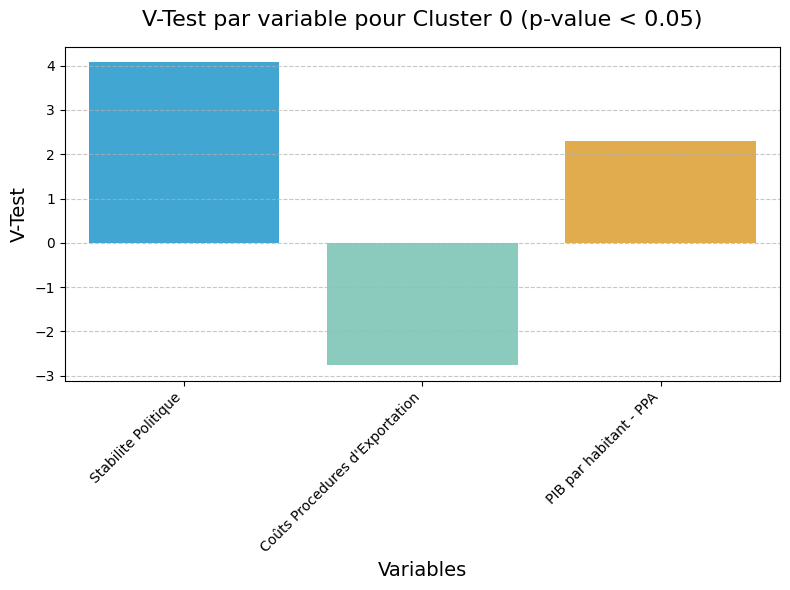

In [39]:
# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Filtrer les données avec p-value < 0.05
graph_c0 = cluster_0.loc[cluster_0["p-value"] < 0.05]

# Configuration de la figure
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Variable",
    y="V-Test",
    data=graph_c0,
    palette=custom_palette[
        : len(graph_c0["Variable"].unique())
    ],  # Ajuster à la taille des données
)

# Ajout de la rotation des étiquettes et des titres
plt.xticks(rotation=45, ha="right")  # Rotation à 45° avec alignement à droite
plt.title("V-Test par variable pour Cluster 0 (p-value < 0.05)", fontsize=16, pad=15)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("V-Test", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [40]:
# Afficher les résultats
cluster_1 = results_df.loc[results_df["Cluster"] == 1, :]
cluster_1 = cluster_1.sort_values(by="p-value", ascending=True)
cluster_1

Variable  Cluster    V-Test  \
25                            Importations - Quantité        1  6.213171   
73                             Dependance Alimentaire        1  4.830002   
61            Indice Dependance Alimentaire etrangere        1  4.451864   
55                             PIB par habitant - PPA        1  4.078047   
19  Disponibilité alimentaire en quantité (kg/pers...        1  3.083775   
1                                 Stabilite Politique        1  2.181265   
67                                Balance Commerciale        1 -2.068975   
49                                     Taux de change        1 -0.774198   
7                      Coûts Procedures d'Exportation        1 -0.411797   
13                          population (millions hab)        1 -0.384187   
37                            Exportations - Quantité        1  0.308425   
31                                         Production        1 -0.280330   
43                           Disponibilité intérieure        1  0.080332   

    Mean in category  Overall mean  SD in category    Overall SD       p-value  
25      4.536429e+02  1.089675e+02    4.116362e+02  2.075683e+02  5.192591e-10  
73      1.025224e+00  3.965956e-01    8.053830e-01  4.869793e-01  1.365317e-06  
61      6.933450e-01  3.091508e-01    3.134049e-01  3.229037e-01  8.512791e-06  
55      5.163765e+04  2.703824e+04    2.907771e+04  2.257025e+04  4.541561e-05  
19      3.476357e+01  2.252756e+01    1.491355e+01  1.484640e+01  2.043921e-03  
1       5.171429e-01  1.617886e-02    6.087115e-01  8.593340e-01  2.916379e-02  
67     -2.773571e+02  2.409756e+01    3.921522e+02  5.451687e+02  3.854845e-02  
49      1.132349e+01  5.109712e+02    2.942749e+01  2.414771e+03  4.388139e-01  
7       3.284229e+02  3.675875e+02    2.199404e+02  3.558560e+02  6.804879e-01  
13      3.375095e+07  5.217167e+07    4.688087e+07  1.794022e+08  7.008397e-01  
37      1.762857e+02  1.330650e+02    2.760182e+02  5.243317e+02  7.577590e-01  
31      7.147143e+02  9.312195e+02    1.055880e+03  2.889765e+03  7.792242e-01  
43      9.439286e+02  8.894959e+02    1.287587e+03  2.535318e+03  9.359729e-01

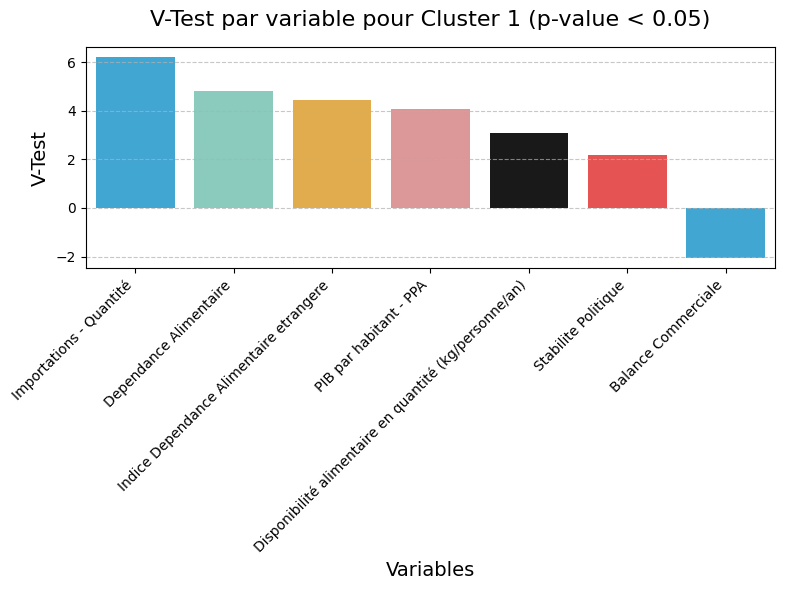

In [41]:
# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Filtrer les données avec p-value < 0.05
graph_c1 = cluster_1.loc[cluster_1["p-value"] < 0.05]

# Configuration de la figure
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Variable",
    y="V-Test",
    data=graph_c1,
    palette=custom_palette[
        : len(graph_c1["Variable"].unique())
    ],  # Ajuster à la taille des données
)

# Ajout de la rotation des étiquettes et des titres
plt.xticks(rotation=45, ha="right")  # Rotation à 45° avec alignement à droite
plt.title("V-Test par variable pour Cluster 1 (p-value < 0.05)", fontsize=16, pad=15)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("V-Test", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [42]:
# Afficher les résultats
cluster_2 = results_df.loc[results_df["Cluster"] == 2, :]
cluster_2 = cluster_2.sort_values(by="p-value", ascending=True)
cluster_2

Variable  Cluster    V-Test  \
2                                 Stabilite Politique        2 -5.422671   
62            Indice Dependance Alimentaire etrangere        2 -4.629071   
56                             PIB par habitant - PPA        2 -4.428552   
20  Disponibilité alimentaire en quantité (kg/pers...        2 -4.422711   
74                             Dependance Alimentaire        2 -4.133994   
50                                     Taux de change        2  2.415661   
26                            Importations - Quantité        2 -2.284051   
38                            Exportations - Quantité        2 -1.077291   
14                          population (millions hab)        2  1.028596   
32                                         Production        2 -0.464330   
44                           Disponibilité intérieure        2 -0.452745   
8                      Coûts Procedures d'Exportation        2  0.194908   
68                                Balance Commerciale        2 -0.166483   

    Mean in category  Overall mean  SD in category    Overall SD       p-value  
2      -7.300000e-01  1.617886e-02    6.643477e-01  8.593340e-01  5.871506e-08  
62      6.980019e-02  3.091508e-01    8.481908e-02  3.229037e-01  3.673105e-06  
56      1.103287e+04  2.703824e+04    7.419850e+03  2.257025e+04  9.486766e-06  
20      1.201333e+01  2.252756e+01    9.235044e+00  1.484640e+01  9.747029e-06  
74      7.423047e-02  3.965956e-01    8.997432e-02  4.869793e-01  3.565134e-05  
50      1.445042e+03  5.109712e+02    4.162387e+03  2.414771e+03  1.570669e-02  
26      3.305128e+01  1.089675e+02    7.138883e+01  2.075683e+02  2.236854e-02  
38      4.261538e+01  1.330650e+02    1.482174e+02  5.243317e+02  2.813502e-01  
14      8.172050e+07  5.217167e+07    2.153636e+08  1.794022e+08  3.036695e-01  
32      7.163590e+02  9.312195e+02    1.031207e+03  2.889765e+03  6.424116e-01  
44      7.056923e+02  8.894959e+02    1.032469e+03  2.535318e+03  6.507322e-01  
8       3.786938e+02  3.675875e+02    2.275889e+02  3.558560e+02  8.454649e-01  
68      9.564103e+00  2.409756e+01    1.631689e+02  5.451687e+02  8.677767e-01

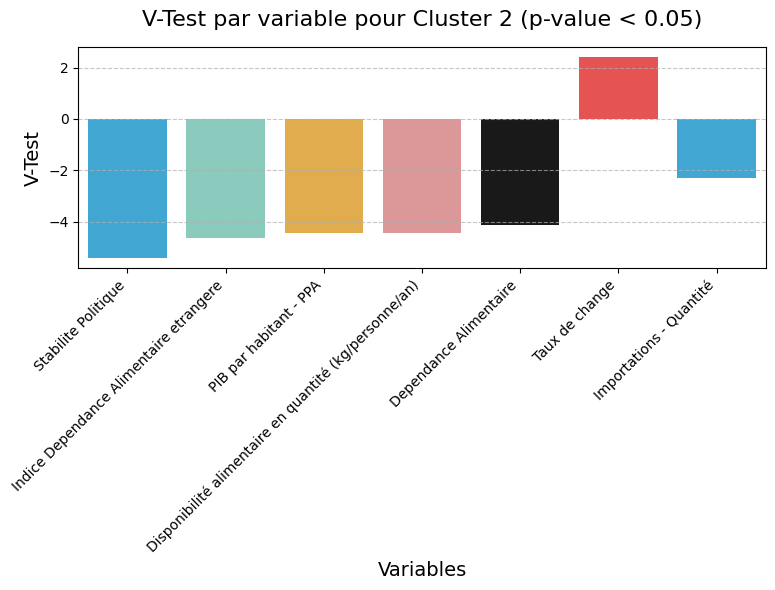

In [43]:
# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Filtrer les données avec p-value < 0.05
graph_c2 = cluster_2.loc[cluster_2["p-value"] < 0.05]

# Configuration de la figure
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Variable",
    y="V-Test",
    data=graph_c2,
    palette=custom_palette[
        : len(graph_c2["Variable"].unique())
    ],  # Ajuster à la taille des données
)

# Ajout de la rotation des étiquettes et des titres
plt.xticks(rotation=45, ha="right")  # Rotation à 45° avec alignement à droite
plt.title("V-Test par variable pour Cluster 2 (p-value < 0.05)", fontsize=16, pad=15)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("V-Test", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [44]:
# Afficher les résultats
cluster_3 = results_df.loc[results_df["Cluster"] == 3, :]
cluster_3 = cluster_3.sort_values(by="p-value", ascending=True)
cluster_3

Variable  Cluster     V-Test  \
33                                         Production        3   8.381380   
39                            Exportations - Quantité        3  10.315165   
69                                Balance Commerciale        3  10.040151   
45                           Disponibilité intérieure        3   7.382275   
21  Disponibilité alimentaire en quantité (kg/pers...        3   2.793624   
15                          population (millions hab)        3   1.689213   
63            Indice Dependance Alimentaire etrangere        3  -1.341295   
75                             Dependance Alimentaire        3  -1.141520   
57                             PIB par habitant - PPA        3   0.914013   
9                      Coûts Procedures d'Exportation        3   0.599665   
27                            Importations - Quantité        3  -0.313188   
51                                     Taux de change        3  -0.298023   
3                                 Stabilite Politique        3  -0.092454   

    Mean in category  Overall mean  SD in category    Overall SD       p-value  
33      1.805750e+04  9.312195e+02    5.453915e+03  2.889765e+03  0.000000e+00  
39      3.957500e+03  1.330650e+02    3.754737e+02  5.243317e+02  0.000000e+00  
69      3.894500e+03  2.409756e+01    4.603265e+02  5.451687e+02  0.000000e+00  
45      1.412400e+04  8.894959e+02    5.857673e+03  2.535318e+03  1.556533e-13  
21      5.185500e+01  2.252756e+01    5.409367e+00  1.484640e+01  5.212102e-03  
15      2.664593e+08  5.217167e+07    8.290893e+07  1.794022e+08  9.117870e-02  
63      2.896365e-03  3.091508e-01    3.797385e-03  3.229037e-01  1.798246e-01  
75      3.517182e-03  3.965956e-01    4.549017e-03  4.869793e-01  2.536535e-01  
57      4.162550e+04  2.703824e+04    3.462023e+04  2.257025e+04  3.607102e-01  
9       5.184800e+02  3.675875e+02    4.857541e+02  3.558560e+02  5.487298e-01  
27      6.300000e+01  1.089675e+02    8.485281e+01  2.075683e+02  7.541381e-01  
51      2.095695e+00  5.109712e+02    1.549546e+00  2.414771e+03  7.656852e-01  
3      -4.000000e-02  1.617886e-02    5.374012e-01  8.593340e-01  9.263373e-01

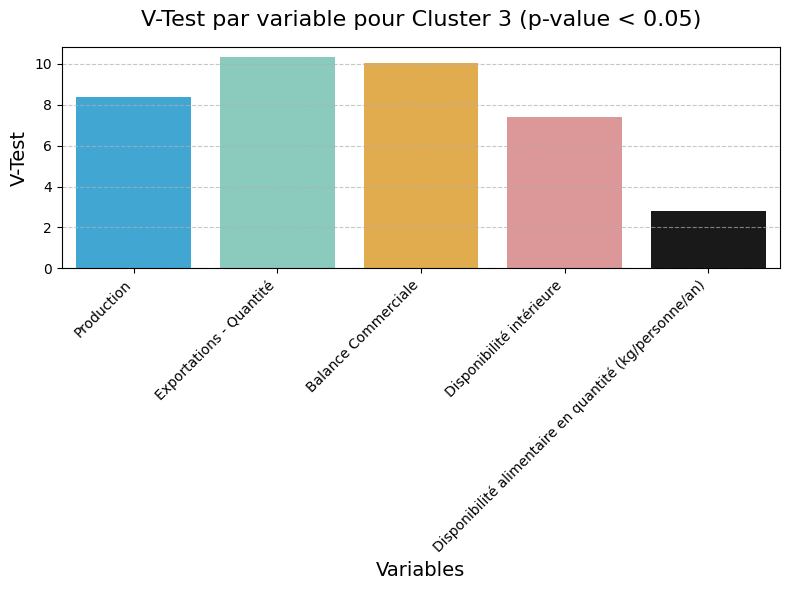

In [45]:
# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Filtrer les données avec p-value < 0.05
graph_c3 = cluster_3.loc[cluster_3["p-value"] < 0.05]

# Configuration de la figure
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Variable",
    y="V-Test",
    data=graph_c3,
    palette=custom_palette[
        : len(graph_c3["Variable"].unique())
    ],  # Ajuster à la taille des données
)

# Ajout de la rotation des étiquettes et des titres
plt.xticks(rotation=45, ha="right")  # Rotation à 45° avec alignement à droite
plt.title("V-Test par variable pour Cluster 3 (p-value < 0.05)", fontsize=16, pad=15)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("V-Test", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [46]:
# Afficher les résultats
cluster_4 = results_df.loc[results_df["Cluster"] == 4, :]
cluster_4 = cluster_4.sort_values(by="p-value", ascending=True)
cluster_4

Variable  Cluster    V-Test  \
16                          population (millions hab)        4  7.630063   
46                           Disponibilité intérieure        4  6.812361   
34                                         Production        4  5.988300   
28                            Importations - Quantité        4  1.652625   
64            Indice Dependance Alimentaire etrangere        4 -0.882505   
40                            Exportations - Quantité        4  0.844761   
76                             Dependance Alimentaire        4 -0.763291   
22  Disponibilité alimentaire en quantité (kg/pers...        4 -0.686871   
58                             PIB par habitant - PPA        4 -0.468632   
10                     Coûts Procedures d'Exportation        4  0.327527   
4                                 Stabilite Politique        4 -0.286476   
52                                     Taux de change        4 -0.208803   
70                                Balance Commerciale        4  0.183251   

    Mean in category  Overall mean  SD in category    Overall SD       p-value  
16      1.421022e+09  5.217167e+07             NaN  1.794022e+08  2.353673e-14  
46      1.816100e+04  8.894959e+02             NaN  2.535318e+03  9.600987e-12  
34      1.823600e+04  9.312195e+02             NaN  2.889765e+03  2.120451e-09  
28      4.520000e+02  1.089675e+02             NaN  2.075683e+02  9.840721e-02  
64      2.418664e-02  3.091508e-01             NaN  3.229037e-01  3.775037e-01  
40      5.760000e+02  1.330650e+02             NaN  5.243317e+02  3.982443e-01  
76      2.488850e-02  3.965956e-01             NaN  4.869793e-01  4.452897e-01  
22      1.233000e+01  2.252756e+01             NaN  1.484640e+01  4.921641e-01  
58      1.646110e+04  2.703824e+04             NaN  2.257025e+04  6.393327e-01  
10      4.841400e+02  3.675875e+02             NaN  3.558560e+02  7.432692e-01  
4      -2.300000e-01  1.617886e-02             NaN  8.593340e-01  7.745133e-01  
52      6.758755e+00  5.109712e+02             NaN  2.414771e+03  8.346017e-01  
70      1.240000e+02  2.409756e+01             NaN  5.451687e+02  8.546015e-01

Les NaN dans la colonne SD in category correspond au fait qu'il n'y a qu'un seul individus.

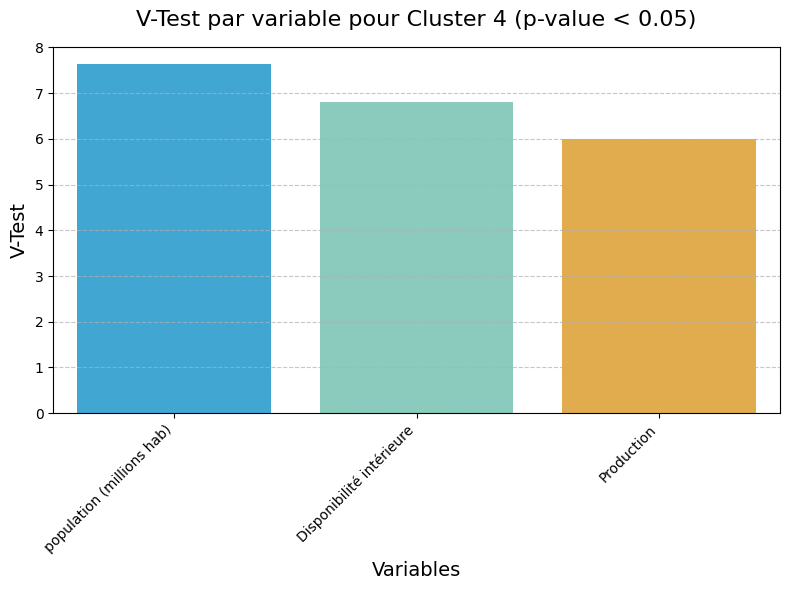

In [47]:
# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Filtrer les données avec p-value < 0.05
graph_c4 = cluster_4.loc[cluster_4["p-value"] < 0.05]

# Configuration de la figure
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Variable",
    y="V-Test",
    data=graph_c4,
    palette=custom_palette[
        : len(graph_c4["Variable"].unique())
    ],  # Ajuster à la taille des données
)

# Ajout de la rotation des étiquettes et des titres
plt.xticks(rotation=45, ha="right")  # Rotation à 45° avec alignement à droite
plt.title("V-Test par variable pour Cluster 4 (p-value < 0.05)", fontsize=16, pad=15)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("V-Test", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [48]:
# Afficher les résultats
cluster_5 = results_df.loc[results_df["Cluster"] == 5, :]
cluster_5 = cluster_5.sort_values(by="p-value", ascending=True)
cluster_5

Variable  Cluster    V-Test  \
11                     Coûts Procedures d'Exportation        5  7.210390   
65            Indice Dependance Alimentaire etrangere        5  4.500155   
77                             Dependance Alimentaire        5  3.471643   
59                             PIB par habitant - PPA        5 -2.175826   
5                                 Stabilite Politique        5 -1.842960   
29                            Importations - Quantité        5  1.090562   
71                                Balance Commerciale        5 -1.064729   
35                                         Production        5 -0.687437   
41                            Exportations - Quantité        5 -0.675319   
17                          population (millions hab)        5 -0.552366   
47                           Disponibilité intérieure        5 -0.537859   
23  Disponibilité alimentaire en quantité (kg/pers...        5  0.279328   
53                                     Taux de change        5 -0.227198   

    Mean in category  Overall mean  SD in category    Overall SD       p-value  
11      1.274756e+03  3.675875e+02    4.945204e+02  3.558560e+02  5.579981e-13  
65      8.229051e-01  3.091508e-01    2.514432e-01  3.229037e-01  6.790382e-06  
77      9.943195e-01  3.965956e-01    4.843827e-01  4.869793e-01  5.172833e-04  
59      9.675612e+03  2.703824e+04    6.398270e+03  2.257025e+04  2.956829e-02  
5      -5.437500e-01  1.617886e-02    1.210229e+00  8.593340e-01  6.533489e-02  
29      1.890000e+02  1.089675e+02    2.053840e+02  2.075683e+02  2.754655e-01  
71     -1.811250e+02  2.409756e+01    1.919080e+02  5.451687e+02  2.869984e-01  
35      2.288750e+02  9.312195e+02    5.820026e+02  2.889765e+03  4.918076e-01  
41      7.875000e+00  1.330650e+02    2.227386e+01  5.243317e+02  4.994734e-01  
17      1.713605e+07  5.217167e+07    2.155771e+07  1.794022e+08  5.806976e-01  
47      4.073750e+02  8.894959e+02    7.172690e+02  2.535318e+03  5.906743e-01  
23      2.399375e+01  2.252756e+01    1.947814e+01  1.484640e+01  7.799935e-01  
53      3.170006e+02  5.109712e+02    4.309526e+02  2.414771e+03  8.202697e-01

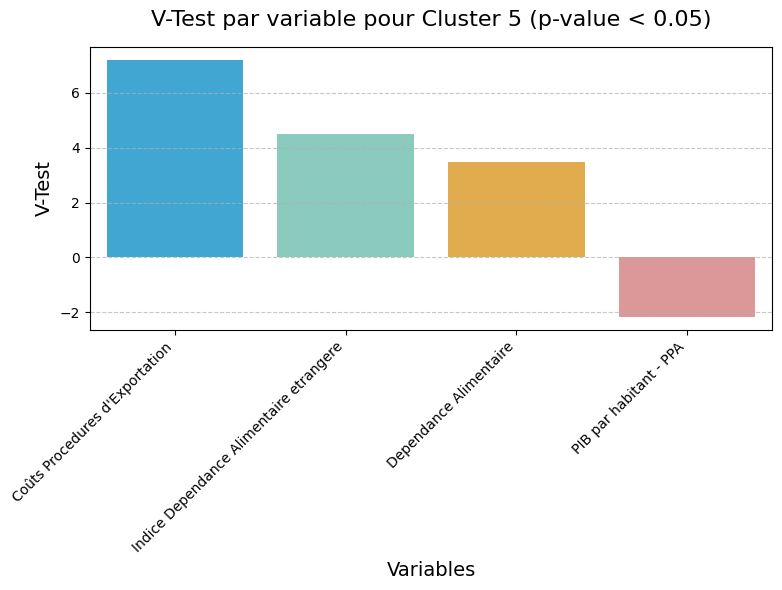

In [49]:
# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Filtrer les données avec p-value < 0.05
graph_c5 = cluster_5.loc[cluster_5["p-value"] < 0.05]

# Configuration de la figure
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Variable",
    y="V-Test",
    data=graph_c5,
    palette=custom_palette[
        : len(graph_c5["Variable"].unique())
    ],  # Ajuster à la taille des données
)

# Ajout de la rotation des étiquettes et des titres
plt.xticks(rotation=45, ha="right")  # Rotation à 45° avec alignement à droite
plt.title("V-Test par variable pour Cluster 5 (p-value < 0.05)", fontsize=16, pad=15)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("V-Test", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

Identifier les Parangons, les individus représentatifs d'un cluster. Ce sont les exemples typiques du groupe auquel ils appartiennent.

In [50]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import pairwise_distances_argmin_min
import pandas as pd

# Exemple : CAH sur des données fictives
data = data_for_cah  # Vos données, normalisées si nécessaire
linkage_matrix = linkage(data, method="ward")  # Clustering hiérarchique

# Découpage en clusters
n_clusters = 6
labels = fcluster(linkage_matrix, n_clusters, criterion="maxclust")

# Ajouter les labels aux données
data["Cluster"] = labels

# Trouver les parangons pour chaque cluster
parangons = {}
for cluster in range(1, n_clusters + 1):
    # Extraire les individus du cluster
    cluster_data = data[data["Cluster"] == cluster].drop(columns=["Cluster"])

    # Calcul du centroïde du cluster
    centroid = cluster_data.mean().values.reshape(1, -1)

    # Trouver l'individu le plus proche du centroïde
    closest, _ = pairwise_distances_argmin_min(centroid, cluster_data)
    parangons[cluster] = cluster_data.iloc[closest[0]].name  # Nom de l'individu

# Affichage des parangons
print("Parangons de chaque cluster :")
for cluster, individual in parangons.items():
    print(f"Cluster {cluster}: {individual}")

Parangons de chaque cluster :
Cluster 1: bresil
Cluster 2: chine
Cluster 3: vietnam
Cluster 4: tunisie
Cluster 5: chypre
Cluster 6: kazakhstan


<h3 style="margin: auto; padding: 20px; color: #000000; ">3.2 - Kmeans</h3>
</div>

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.2.1 Préparer les données</h4>
</div>

In [51]:
# Extraire les coordonnées des individus
data_for_kmeans = res_pca.ind_["coord"].iloc[:, :4]  # 4 premières dimensions
print(data_for_kmeans.head())

                   Dim.1     Dim.2     Dim.3     Dim.4
afrique du sud  0.217079 -0.059534  2.152601  0.222878
albanie        -1.068446  0.606989  0.218196 -0.326235
algerie        -0.144794 -2.060303 -0.010765 -0.290359
allemagne       0.640518  2.160439  0.859133  2.174709
angola         -1.207511  0.221368  2.397442 -0.476783


<h4 style="margin: auto; padding: 20px; color: #000000; ">3.2.2 Déterminer le nombre optimal de clusters</h4>
</div>

Interprétation des graphiques de 4 méthodes :
- Méthode du coude : Regardez où le graphe montre une forte décroissance suivie d'un aplatissement.
- Davies-Bouldin : Cherchez le point le plus bas.
- Critère silhouette : Plus haut est mieux.
- Calinski-Harabasz : Cherchez le pic le plus élevé.

Ces informations combinées aident à déterminer le nombre optimal de clusters.

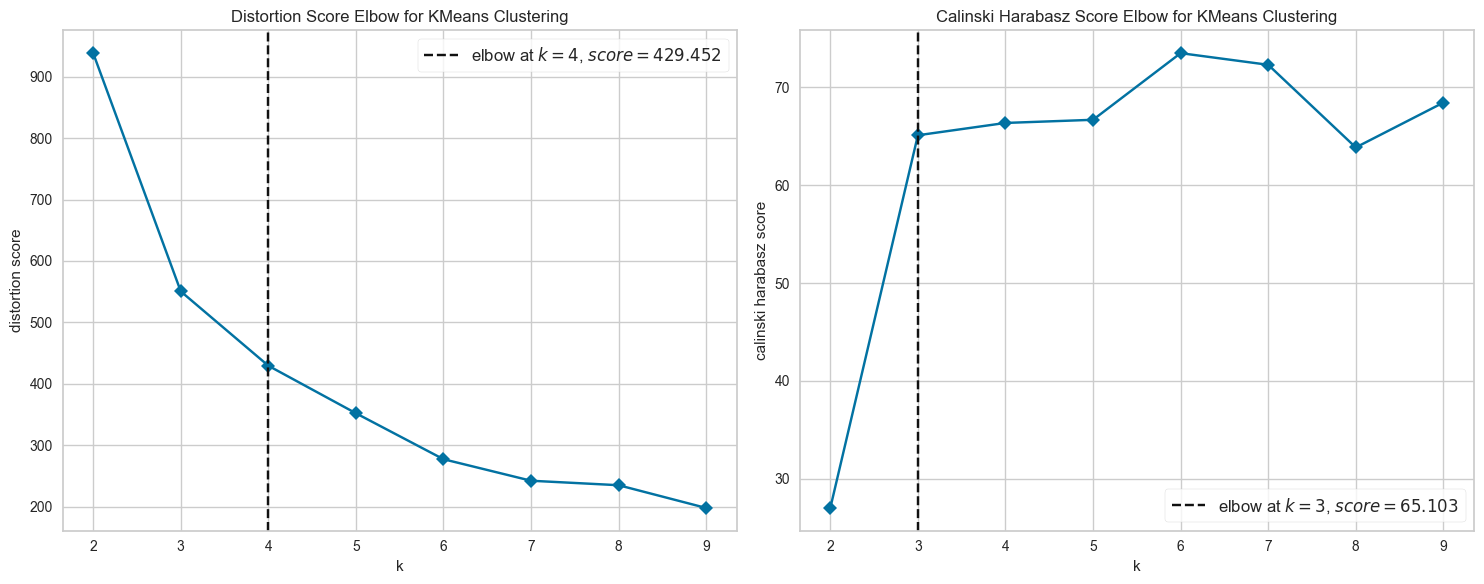

In [52]:
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans


# Préparer la figure et les subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1 : Méthode du coude avec l'inertie
visualizer1 = KElbowVisualizer(
    KMeans(random_state=4), k=(2, 10), ax=axes[0], timings=False
)
visualizer1.fit(data_for_kmeans)  # Ajustement sur les données
visualizer1.finalize()  # Finaliser le graphique

# Graphique 2 : Méthode avec l'indice de Calinski-Harabasz
visualizer2 = KElbowVisualizer(
    KMeans(random_state=4),
    k=(2, 10),
    metric="calinski_harabasz",
    ax=axes[1],
    timings=False,
)
visualizer2.fit(data_for_kmeans)  # Ajustement sur les données
visualizer2.finalize()  # Finaliser le graphique

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()

Les 2 méthodes déterminent 4 ou 3 clusters.

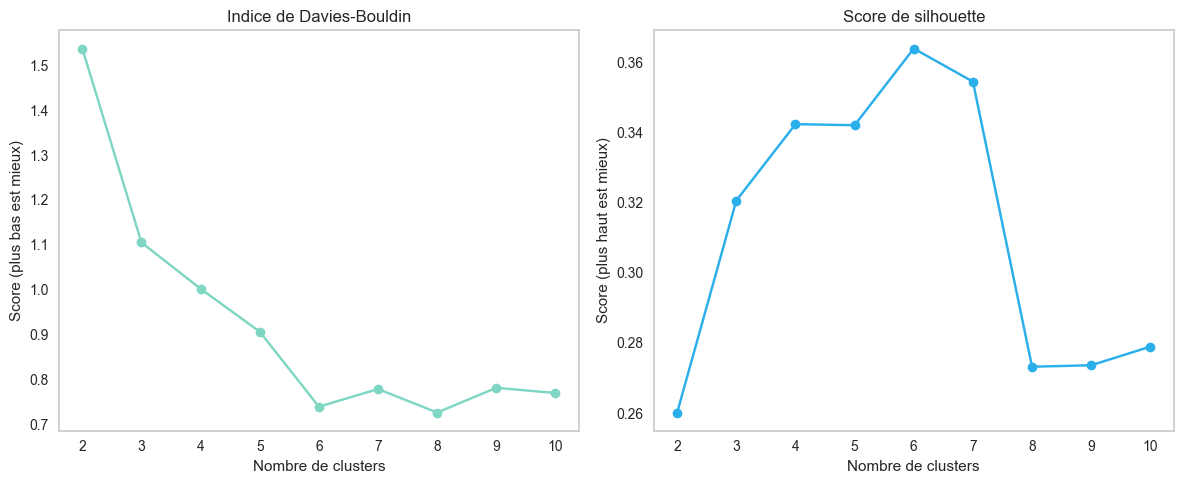

In [53]:
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Définir le range des clusters
range_n_clusters = range(2, 11)

# Initialisation des listes pour les scores
davies_scores = []
silhouette_scores = []

# Boucle sur les nombres de clusters
for n_clusters in range_n_clusters:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(
        data_for_kmeans
    )  # Utiliser les 4 premières dimensions de l'ACP

    # Calcul des métriques
    davies_scores.append(davies_bouldin_score(data_for_kmeans, labels))
    silhouette_scores.append(silhouette_score(data_for_kmeans, labels))

# Tracer les graphiques
plt.figure(figsize=(12, 5))


# Indice de Davies-Bouldin
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, davies_scores, marker="o", linestyle="-", color="#7fd6c3")
plt.title("Indice de Davies-Bouldin")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score (plus bas est mieux)")
plt.grid()

# Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(
    range_n_clusters, silhouette_scores, marker="o", linestyle="-", color="#2AAFEB"
)
plt.title("Score de silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score (plus haut est mieux)")
plt.grid()

plt.tight_layout()
plt.show()

Les 2 méthodes convergent vers un nombre de 2 clusters.

**Visualiseur de silhouettes**

Ce graphique affiche le coefficient de silhouette pour chaque échantillon par groupe, en visualisant les groupes denses et ceux qui ne le sont pas. Ceci est particulièrement utile pour déterminer le déséquilibre des groupes ou pour sélectionner une valeur pour
en comparant plusieurs visualiseurs.

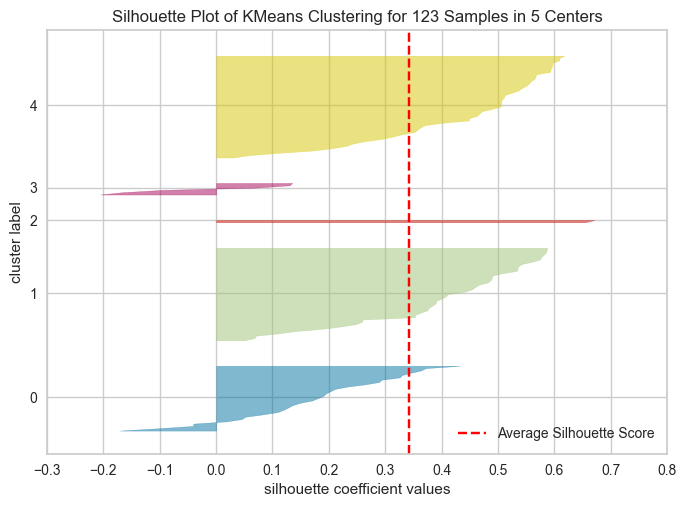

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 123 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))

In [54]:
from yellowbrick.cluster import silhouette_visualizer

# Visualisation avec 5 clusters
silhouette_visualizer(KMeans(5, random_state=42), data_for_kmeans, colors="yellowbrick")

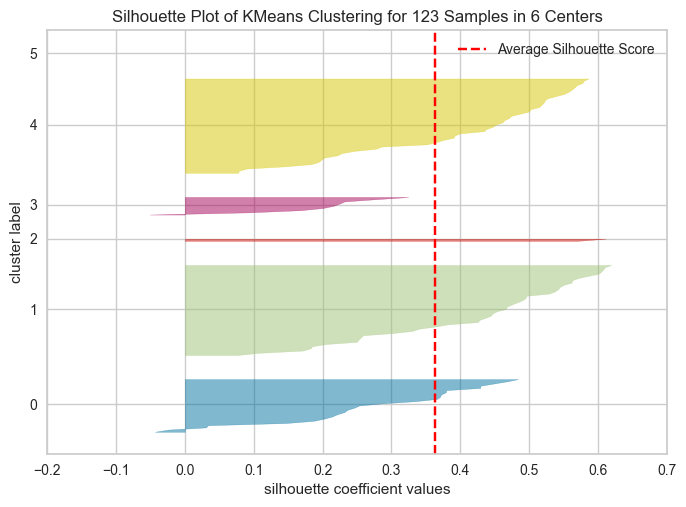

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 123 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=42))

In [55]:
# Visualisation avec 6 clusters
silhouette_visualizer(KMeans(6, random_state=42), data_for_kmeans, colors="yellowbrick")

Comparaison des métriques :

Nombre de clusters: 5
  Indice de silhouette: 0.3420
  Indice de Calinski-Harabasz: 61.9960
  Indice de Davies-Bouldin: 0.9060

Nombre de clusters: 6
  Indice de silhouette: 0.3638
  Indice de Calinski-Harabasz: 73.7664
  Indice de Davies-Bouldin: 0.7389


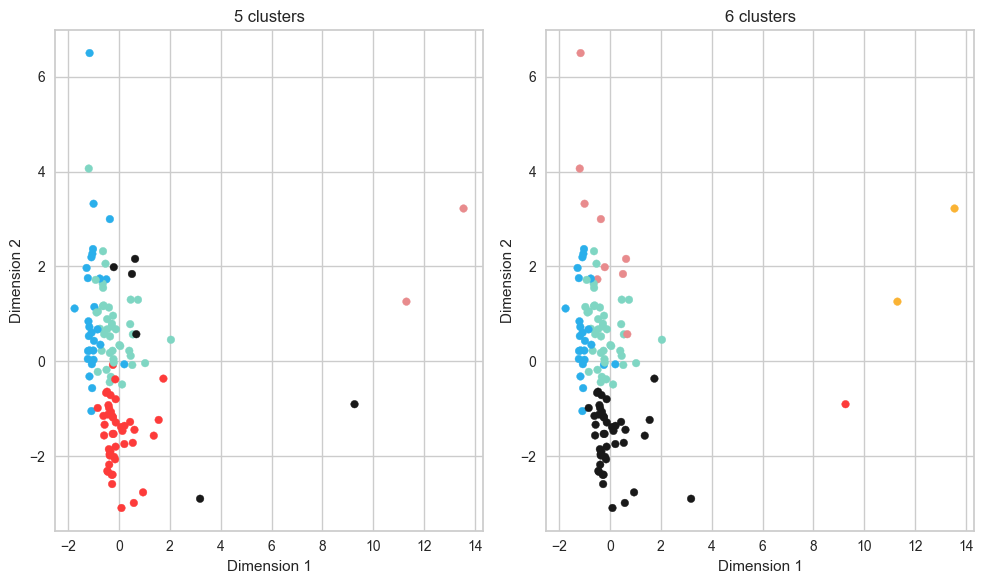

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import intercluster_distance

# Définir une palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]
custom_cmap = ListedColormap(custom_palette)

# Définir les nombres de clusters à comparer
k_values = [5, 6]

# Stocker les résultats des modèles
results = {}

for k in k_values:
    # Créer et ajuster le modèle KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_kmeans)

    # Calculer les métriques
    silhouette = silhouette_score(data_for_kmeans, labels)
    calinski = calinski_harabasz_score(data_for_kmeans, labels)
    davies = davies_bouldin_score(data_for_kmeans, labels)

    # Sauvegarder les résultats
    results[k] = {
        "labels": labels,
        "silhouette": silhouette,
        "calinski": calinski,
        "davies": davies,
        "kmeans": kmeans,
    }

# Afficher les scores comparatifs
print("Comparaison des métriques :")
for k, metrics in results.items():
    print(f"\nNombre de clusters: {k}")
    print(f"  Indice de silhouette: {metrics['silhouette']:.4f}")
    print(f"  Indice de Calinski-Harabasz: {metrics['calinski']:.4f}")
    print(f"  Indice de Davies-Bouldin: {metrics['davies']:.4f}")

# Visualisation des clusters sur les deux premières dimensions
plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values, 1):
    plt.subplot(1, len(k_values), i)
    plt.scatter(
        data_for_kmeans.iloc[:, 0],
        data_for_kmeans.iloc[:, 1],
        c=results[k]["labels"],
        cmap=custom_cmap,
        s=30,
    )
    plt.title(f"{k} clusters")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)

plt.tight_layout()
plt.show()

La comparaison des métriques indiquent de meilleures performances avec 6 clusters. 

**Les cartes de distance inter-clusters** affichent une intégration des centres de cluster en 2 dimensions avec la distance aux autres centres préservée. Par exemple, plus les centres sont proches dans la visualisation, plus ils sont proches dans l'espace des caractéristiques d'origine. Les clusters sont dimensionnés en fonction d'une mesure de notation. Par défaut, ils sont dimensionnés en fonction de l'appartenance, par exemple le nombre d'instances appartenant à chaque centre. Cela donne une idée de l'importance relative des clusters. Notez cependant que, comme deux clusters se chevauchent dans l'espace 2D, cela n'implique pas qu'ils se chevauchent dans l'espace des caractéristiques d'origine.

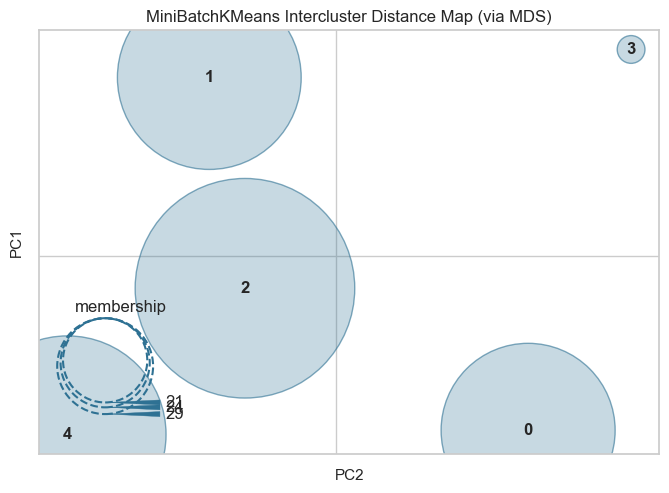

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=777))

In [57]:
# Cartes de distance entre les groupes avec 5 clusters
intercluster_distance(MiniBatchKMeans(5, random_state=777), data_for_kmeans)

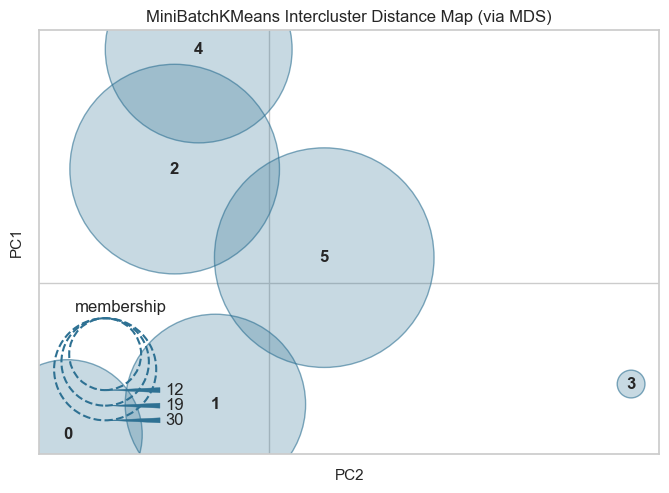

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=6, random_state=777))

In [58]:
# Cartes de distance entre les groupes avec 6 clusters
intercluster_distance(MiniBatchKMeans(6, random_state=777), data_for_kmeans)

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.2.3 Exécuter l'algorithme K-means</h4>
</div>

In [59]:
from numpy.random import seed

# Fixer les résultats de l'analyse afin d'obtenir des résultats reproductibles.
seed(123)

# Nombre optimal de clusters
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data_for_kmeans)

# Ajouter les labels aux données d'origine
data_for_kmeans["Cluster"] = labels

<h4 style="margin: auto; padding: 20px; color: #000000; ">3.2.4 Interpréter les résultats</h4>
</div>

In [60]:
# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)

Centres des clusters :
[[-1.00501178  0.65016674  1.39269434 -0.9295883 ]
 [-0.18756404  0.63086958 -1.07789189  0.18943428]
 [12.42309972  2.24068524 -0.43499863 -3.48398665]
 [-0.27822101  2.79672806  1.10278142  1.74337872]
 [ 0.03177412 -1.62505119 -0.0604917   0.03605155]
 [ 9.26271246 -0.90036175  4.06070001  4.97476437]]


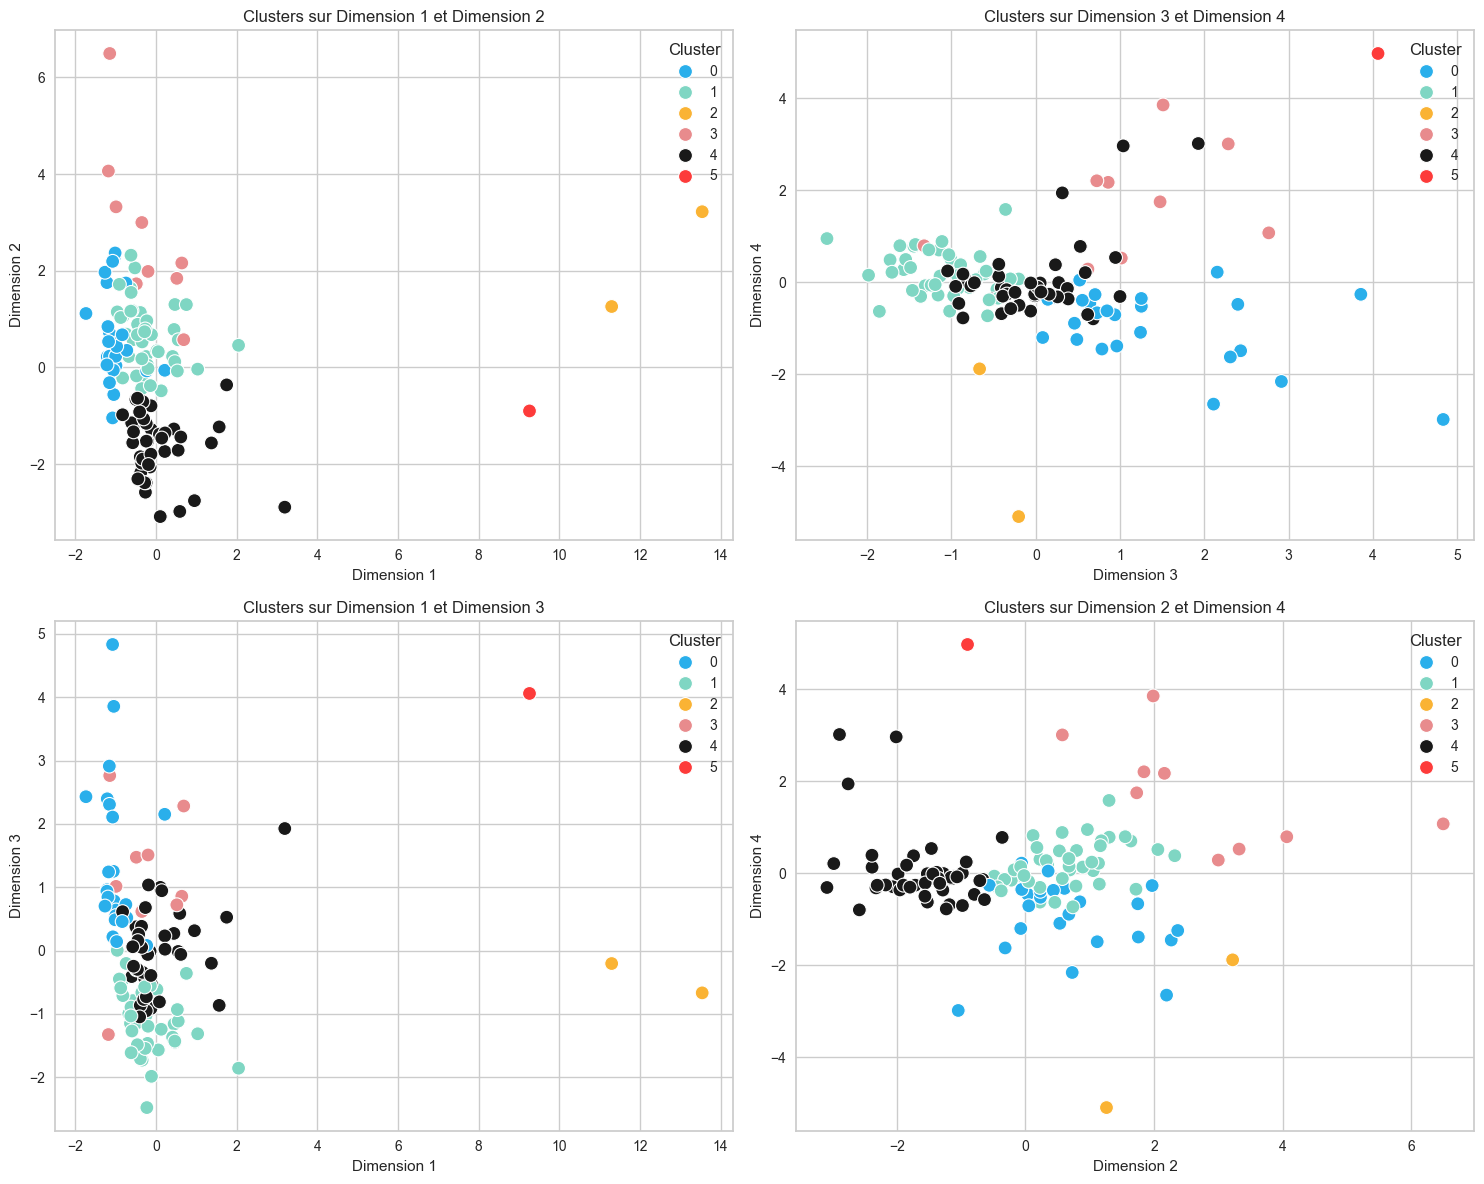

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir une palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]
custom_cmap = ListedColormap(custom_palette)


# Configuration de la figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Sous-graphiques pour chaque paire de dimensions
dimensions = [
    (0, 1, "Dimension 1", "Dimension 2"),
    (2, 3, "Dimension 3", "Dimension 4"),
    (0, 2, "Dimension 1", "Dimension 3"),
    (1, 3, "Dimension 2", "Dimension 4"),
]

for i, (dim_x, dim_y, xlabel, ylabel) in enumerate(dimensions):
    sns.scatterplot(
        x=data_for_kmeans.iloc[:, dim_x],
        y=data_for_kmeans.iloc[:, dim_y],
        hue=labels,
        palette=custom_cmap,
        s=100,
        ax=axes[i],
    )
    axes[i].set_title(f"Clusters sur {xlabel} et {ylabel}")
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].legend(title="Cluster")
    axes[i].grid(True)

# Ajuster les espaces entre les graphiques
plt.tight_layout()
plt.show()

In [62]:
# Ajout des labels des clusters dans le DataFrame
df_poule_qui_chante["Cluster"] = labels


# Nombre d'individus par cluster
nombre_individus = df_poule_qui_chante["Cluster"].value_counts()
print("Nombre d'individus par cluster :")
print(nombre_individus)

# Liste des individus par cluster
individus_par_cluster = df_poule_qui_chante.groupby("Cluster").apply(
    lambda x: x.index.tolist()
)
print("\nIndividus par cluster :")
for cluster, individus in individus_par_cluster.items():
    print(f"Cluster {cluster}: {individus}")
    print("-" * 50)

Nombre d'individus par cluster :
Cluster
4    44
1    42
0    25
3     9
2     2
5     1
Name: count, dtype: int64

Individus par cluster :
Cluster 0: ['afrique du sud', 'albanie', 'angola', 'antigua-et-barbuda', 'armenie', 'benin', 'dominique', 'gabon', 'georgie', 'ghana', 'iles salomon', 'irak', 'jamaique', 'kazakhstan', 'koweit', 'lesotho', 'liberia', 'macedoine du nord', 'montenegro', 'namibie', 'oman', 'republique democratique du congo', 'saint-kitts-et-nevis', 'samoa', 'suriname']
--------------------------------------------------
Cluster 1: ['argentine', 'australie', 'autriche', 'barbade', 'bielorussie', 'botswana', 'bulgarie', 'canada', 'chili', 'chypre', 'costa rica', 'croatie', 'danemark', 'espagne', 'estonie', 'fidji', 'finlande', 'france', 'grece', 'hongrie', 'irlande', 'islande', 'israel', 'italie', 'lettonie', 'lituanie', 'malaisie', 'malte', 'maurice', 'norvege', 'nouvelle-zelande', 'panama', 'pologne', 'portugal', 'republique dominicaine', 'roumanie', 'slovaquie', 'slov

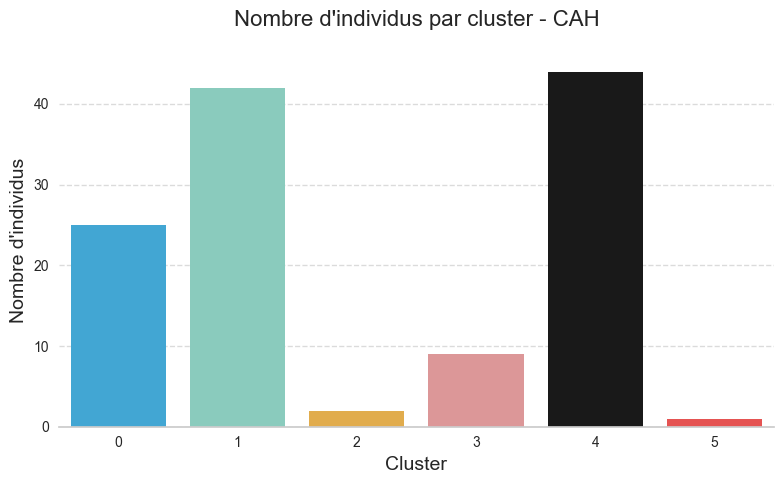

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Nombre d'individus par cluster
nombre_individus = df_poule_qui_chante["Cluster"].value_counts()

# Préparation des données pour le graphique
df_nombre_individus = nombre_individus.reset_index()
df_nombre_individus.columns = ["Cluster", "Count"]
df_nombre_individus = df_nombre_individus.sort_values(
    "Cluster"
)  # Tri par numéro de cluster

# Tracer le graphique
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_nombre_individus,
    x="Cluster",
    y="Count",
    palette=custom_palette[: len(df_nombre_individus)],
)


# Supprimer les axes inutiles
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Ajouter des détails au graphique
plt.title("Nombre d'individus par cluster - CAH", fontsize=16, pad=20)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Nombre d'individus", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajuster la disposition et afficher le graphique
plt.tight_layout()
plt.show()

In [70]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


# Fonction de calcul des statistiques conditionnelles
def stat_comp(data, labels):
    """
    Calcule les moyennes conditionnelles, la variance expliquée,
    et les effectifs pour chaque cluster.

    Args:
        data (pd.Series): Série contenant les données à analyser.
        labels (np.ndarray): Labels des clusters (par KMeans ou autre algorithme).

    Returns:
        pd.DataFrame: Moyennes conditionnelles et % variance expliquée.
    """
    # Nombre de groupes
    K = len(np.unique(labels))
    # Moyenne globale
    global_mean = np.mean(data)
    # Variabilité totale (TSS)
    TSS = np.sum((data - global_mean) ** 2)
    # Effectifs conditionnels
    nk = pd.Series(labels).value_counts()
    # Moyennes conditionnelles
    mk = data.groupby(labels).mean()
    # Variabilité expliquée (BSS)
    BSS = np.sum(nk * (mk - global_mean) ** 2)
    # Pourcentage de variance expliquée
    explained_variance = 100.0 * BSS / TSS

    # Résultat dans un DataFrame
    result = pd.DataFrame(
        {
            "Cluster": [f"G{i}" for i in range(K)] + ["% explained"],
            "Value": list(mk) + [explained_variance],
        }
    )
    return result

In [76]:
# Calculer les statistiques pour chaque variable
results = []
for col in df_poule_qui_chante.columns:
    stats = stat_comp(df_poule_qui_chante[col], labels)
    stats["Variable"] = col  # Ajouter le nom de la variable
    results.append(stats)

# Concaténer les résultats dans un DataFrame final
final_stats = pd.concat(results, ignore_index=True)

pivoted_stats = final_stats.pivot(index="Cluster", columns="Variable", values="Value")


# Afficher les résultats
pivoted_stats.head()

Variable     Balance Commerciale  Cluster  Coûts Procedures d'Exportation  \
Cluster                                                                     
% explained            88.214418    100.0                       25.465041   
G0                    -95.600000      0.0                      668.477600   
G1                     21.023810      1.0                      183.040476   
G2                   3894.500000      2.0                      518.480000   
G3                   -402.777778      3.0                      234.947778   

Variable     Dependance Alimentaire  \
Cluster                               
% explained               49.672035   
G0                         0.871875   
G1                         0.318639   
G2                         0.003517   
G3                         1.058111   

Variable     Disponibilité alimentaire en quantité (kg/personne/an)  \
Cluster                                                               
% explained                                          29.575331        
G0                                                   25.192800        
G1                                                   28.159048        
G2                                                   51.855000        
G3                                                   30.416667        

Variable     Disponibilité intérieure  Exportations - Quantité  \
Cluster                                                          
% explained                 86.200618                91.001191   
G0                         188.320000                 4.520000   
G1                         408.214286                86.500000   
G2                       14124.000000              3957.500000   
G3                        1433.000000               272.000000   

Variable     Importations - Quantité  Indice Dependance Alimentaire etrangere  \
Cluster                                                                         
% explained                63.379027                                70.213592   
G0                        100.120000                                 0.784064   
G1                         65.476190                                 0.226172   
G2                         63.000000                                 0.002896   
G3                        674.777778                                 0.561069   

Variable     PIB par habitant - PPA    Production  Stabilite Politique  \
Cluster                                                                  
% explained               55.394199     89.974268            43.317241   
G0                     16674.112000     93.840000            -0.037200   
G1                     41768.795238    462.761905             0.665238   
G2                     41625.500000  18057.500000            -0.040000   
G3                     62196.788889   1104.777778             0.437778   

Variable     Taux de change  population (millions hab)  
Cluster                                                 
% explained        5.837044               5.338084e+01  
G0               171.111061               8.997553e+06  
G1                42.946268               1.307531e+07  
G2                 2.095695               2.664593e+08  
G3                16.637892               5.150803e+07

In [71]:
# Calculer les statistiques pour chaque variable
stats = df_poule_qui_chante.apply(lambda col: stat_comp(col, labels))

# Afficher les résultats
print(stats)

ValueError: If using all scalar values, you must pass an index

In [66]:
# Calcul des moyennes conditionnelles par cluster
moyennes_conditionnelles = df_poule_qui_chante.groupby("Cluster").mean()

print("Moyennes conditionnelles pour chaque cluster :")
moyennes_conditionnelles.head(6)

Moyennes conditionnelles pour chaque cluster :


Stabilite Politique  Coûts Procedures d'Exportation  \
Cluster                                                        
0                  -0.037200                      668.477600   
1                   0.665238                      183.040476   
2                  -0.040000                      518.480000   
3                   0.437778                      234.947778   
4                  -0.651136                      390.408864   
5                  -0.230000                      484.140000   

         population (millions hab)  \
Cluster                              
0                     8.997553e+06   
1                     1.307531e+07   
2                     2.664593e+08   
3                     5.150803e+07   
4                     7.330683e+07   
5                     1.421022e+09   

         Disponibilité alimentaire en quantité (kg/personne/an)  \
Cluster                                                           
0                                                25.192800        
1                                                28.159048        
2                                                51.855000        
3                                                30.416667        
4                                                12.922727        
5                                                12.330000        

         Importations - Quantité    Production  Exportations - Quantité  \
Cluster                                                                   
0                     100.120000     93.840000                 4.520000   
1                      65.476190    462.761905                86.500000   
2                      63.000000  18057.500000              3957.500000   
3                     674.777778   1104.777778               272.000000   
4                      34.068182    646.909091                38.227273   
5                     452.000000  18236.000000               576.000000   

         Disponibilité intérieure  Taux de change  PIB par habitant - PPA  \
Cluster                                                                     
0                      188.320000      171.111061            16674.112000   
1                      408.214286       42.946268            41768.795238   
2                    14124.000000        2.095695            41625.500000   
3                     1433.000000       16.637892            62196.788889   
4                      642.022727     1286.528273            11251.786364   
5                    18161.000000        6.758755            16461.100000   

         Indice Dependance Alimentaire etrangere  Balance Commerciale  \
Cluster                                                                 
0                                       0.784064           -95.600000   
1                                       0.226172            21.023810   
2                                       0.002896          3894.500000   
3                                       0.561069          -402.777778   
4                                       0.087389             4.159091   
5                                       0.024187           124.000000   

         Dependance Alimentaire  
Cluster                          
0                      0.871875  
1                      0.318639  
2                      0.003517  
3                      1.058111  
4                      0.091969  
5                      0.024888

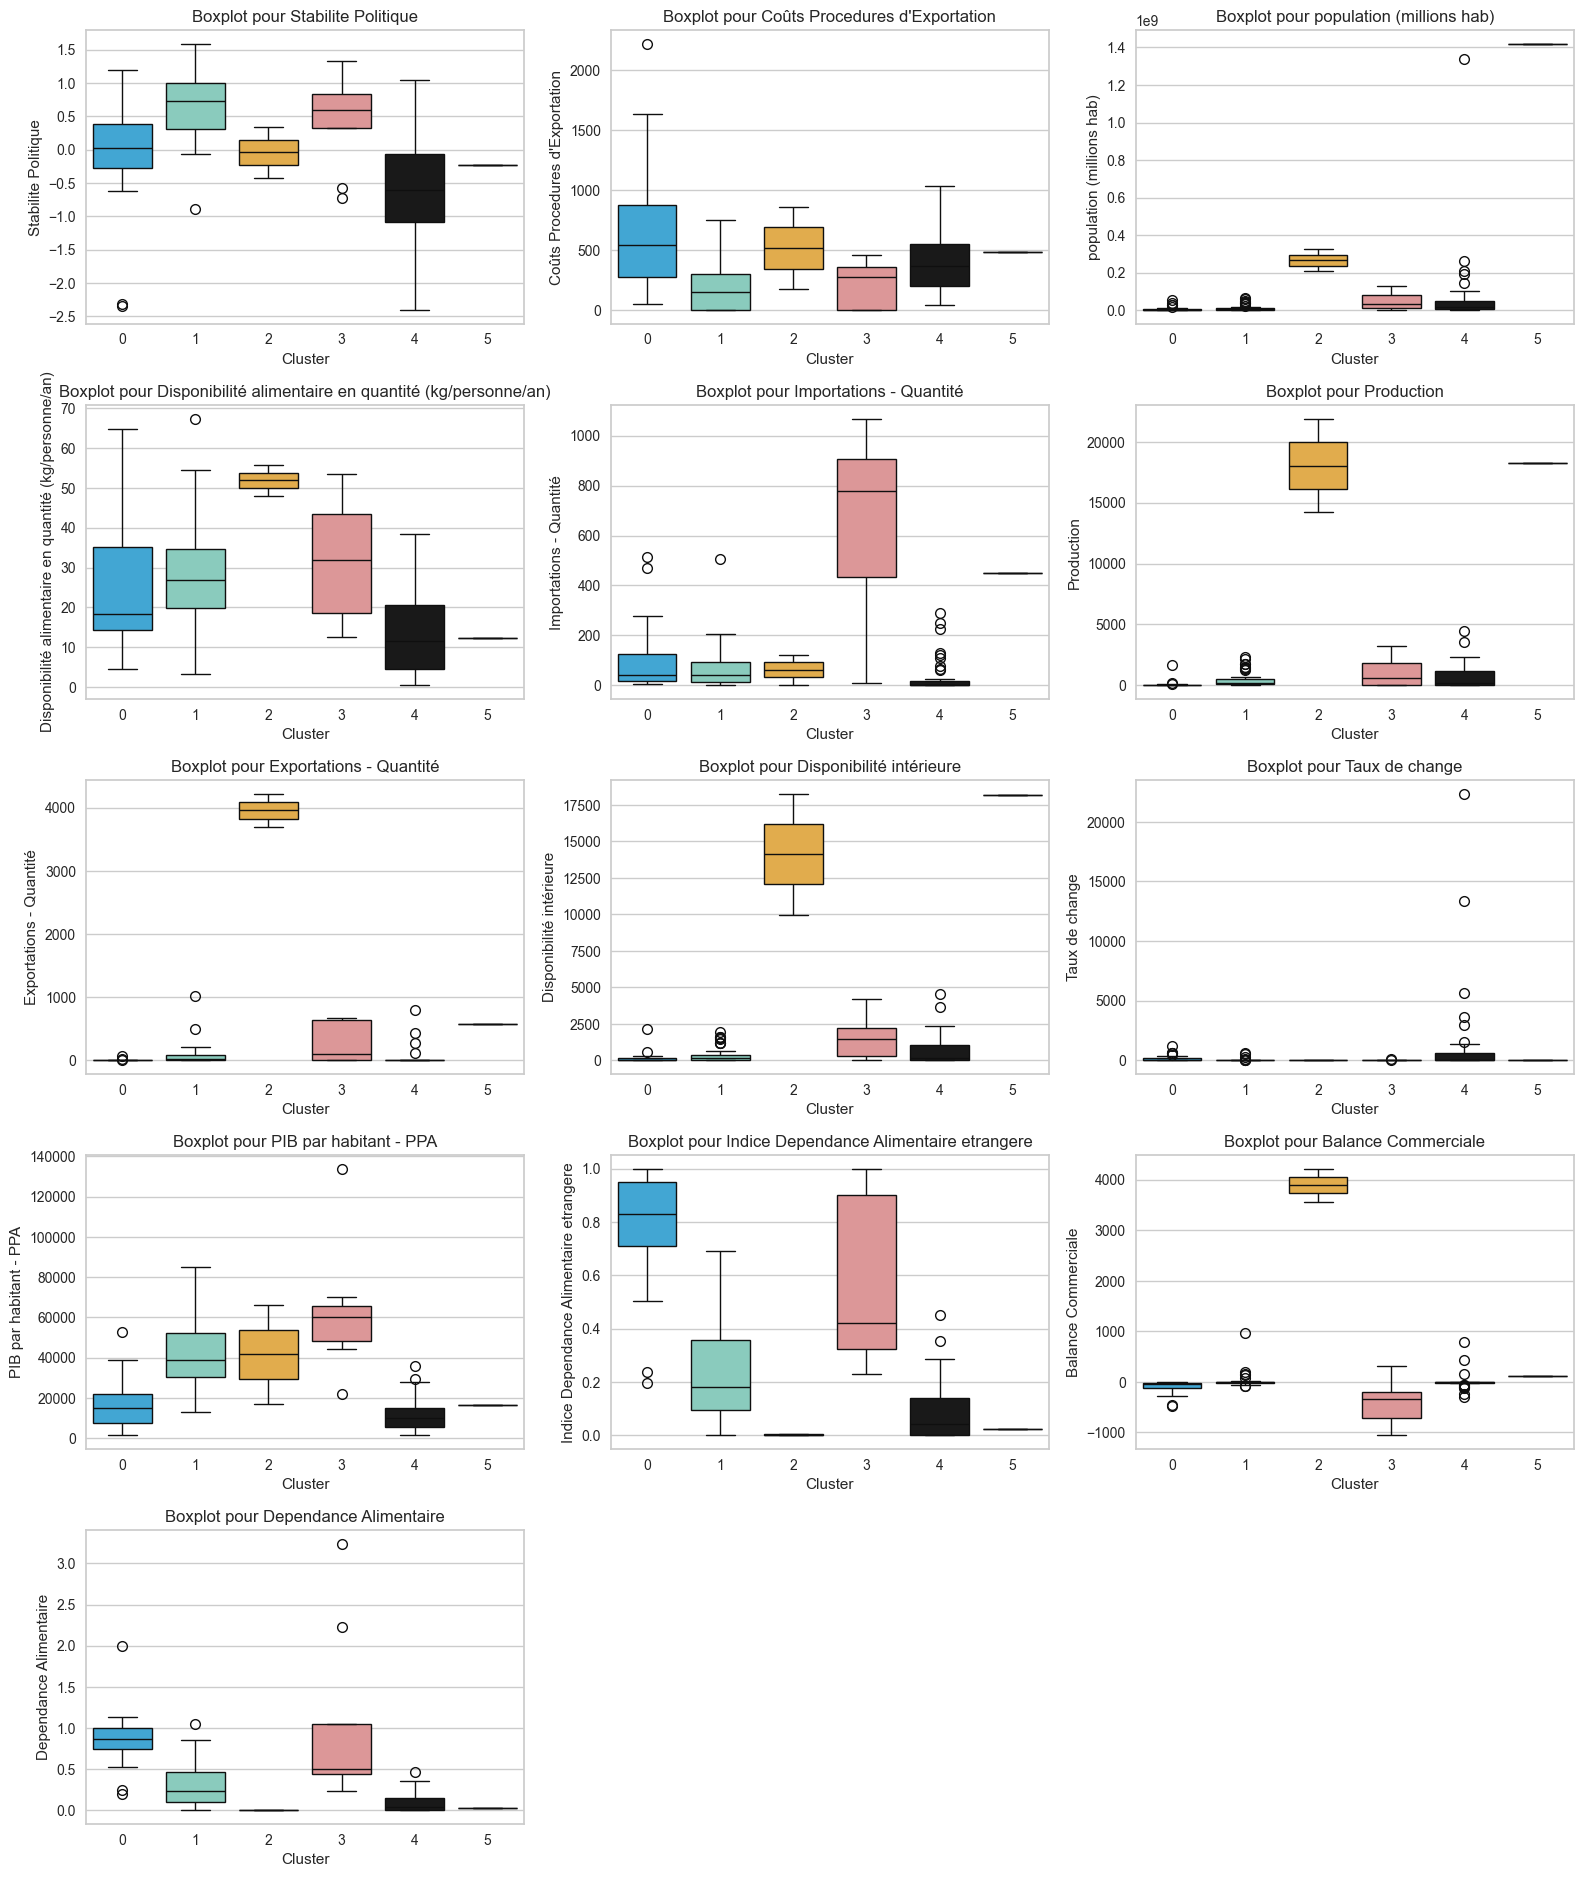

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir une palette de couleurs personnalisée
custom_palette = ["#2AAFEB", "#7fd6c3", "#FAB334", "#E88B8D", "#191919", "#FD3B3A"]

# Ajouter les clusters au DataFrame
df_poule_qui_chante["Cluster"] = labels

# Configuration de la figure
variables = df_poule_qui_chante.columns.drop("Cluster")  # Exclure la colonne Cluster
n_variables = len(variables)
fig, axes = plt.subplots(
    nrows=(n_variables + 1) // 2, ncols=3, figsize=(16, n_variables * 2)
)
axes = axes.flatten()  # Pour itérer facilement sur les axes

# Tracer un boxplot pour chaque variable
for i, var in enumerate(variables):
    sns.boxplot(
        data=df_poule_qui_chante, x="Cluster", y=var, ax=axes[i], palette=custom_palette
    )
    axes[i].set_title(f"Boxplot pour {var}")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(var)

# Masquer les axes inutilisés
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuster la disposition
plt.tight_layout()
plt.show()

**Caractéristiques du cluster 0**

- Stabilité politique : Faible valeur proche de zéro (-0.037), indiquant une situation politiquement neutre ou instable.
- Coûts des procédures d'exportation : Très élevés (668), ce qui pourrait être un frein pour les exportations.
- Population : Relativement faible (8.99 millions), indiquant des petits marchés nationaux.
- Disponibilité alimentaire : Faible (25.19 kg/personne/an), suggérant un niveau de consommation alimentaire limité.
- Balance commerciale : Très négative (-95.6), indiquant une dépendance accrue aux importations.
- Indice de dépendance alimentaire étrangère : Élevé (0.78), reflétant une forte dépendance extérieure.

Interprétation : Ce cluster représente probablement des pays avec de faibles capacités de production locale, des marchés restreints et une forte dépendance alimentaire étrangère.

**Caractéristiques du cluster 1**

- Stabilité politique : Positive (0.665), indiquant des pays politiquement stables.
- Coûts des procédures d'exportation : Bas (183), favorable aux exportations.
- Population : Moyenne (13 millions), marchés de taille modérée.
- PIB par habitant : Élevé (41,768), reflétant une richesse importante par habitant.
- Dépendance alimentaire étrangère : Faible (0.23), indiquant une autosuffisance alimentaire relative.

Interprétation : Ce cluster correspond à des pays politiquement stables, économiquement développés, avec des coûts logistiques faibles et une autosuffisance alimentaire.


**Caractéristiques du cluster 2**

- Production et disponibilité intérieure : Très élevées (18,057 et 14,124), représentant des nations à forte capacité agricole.
- Exportations alimentaires : Très élevées également (3,957), indiquant un rôle majeur dans le commerce international.
- PIB par habitant : Élevé (41,625), reflétant une économie robuste.
- Indice de dépendance alimentaire : Quasi nul (0.0028), témoignant d'une autosuffisance alimentaire complète.

Interprétation : Ce cluster regroupe probablement des grandes puissances agricoles et économiques, exportatrices nettes de produits alimentaires.


**Caractéristiques du cluster 3**

- Stabilité politique : Relativement bonne (0.437).
- Exportations : Élevées (272), mais la balance commerciale est négative (-402), avec des - importations importantes.
- PIB par habitant : Très élevé (62,196), ce qui reflète une richesse significative.
- Dépendance alimentaire étrangère : Modérément élevée (0.56).

Interprétation : Ce cluster représente des économies riches mais importatrices nettes de produits alimentaires, avec une dépendance relative aux marchés étrangers.


**Caractéristiques du cluster 4**

- Stabilité politique : Négative (-0.651), reflétant des contextes instables.
- Population : Moyenne (73 millions), représentant des marchés de taille intermédiaire.
- Disponibilité alimentaire : Très faible (12.92), indiquant un faible niveau de consommation.
- PIB par habitant : Bas (11,251), reflétant un faible niveau de développement économique.
- Dépendance alimentaire étrangère : Modérée (0.08).

Interprétation : Ce cluster semble regrouper des pays politiquement instables et économiquement faibles, avec des populations moyennes et une faible consommation alimentaire.


**Caractéristiques du cluster 5**

- Population : Très grande (1.42 milliards), représentant des marchés massifs.
- Production et disponibilité intérieure : Élevées (18,236 et 18,161), reflétant une capacité de production significative.
- Dépendance alimentaire : Très faible (0.02), indiquant une autosuffisance alimentaire forte.

Interprétation : Ce cluster représente des pays à très grande population, autosuffisants, et avec des capacités agricoles robustes.

<h3 style="margin: auto; padding: 20px; color: #000000; ">Conclusions</h3>
</div>

Sachant que **la France appartient au Cluster 1**, s'intéresser à celui-ci revient à se développer sur le marché européen dans un premier temps.

**Le Clusters 3** représentent les opportunités de développement.

**Les pays du Cluster 2 et 5 ('bresil', 'etats-unis', 'chine')** représentent une forte concurrence, car ils exportent massivement. Cependant, le paradoxe chinois (importateur et exportateur) implique une stratégie d'exportation personnalisée.

Les Cluster 0 et Cluster 4, moins favorables économiquement et politiquement ne sont pas à privilégier.

En définitive, **l'algorythme Kmeans est retenue** pour cette analyse. Celui-ci propose une séparation bien plus nette entre les clusters avec 6 groupes mais aussi plus adaptée aux besoins métiers.